# Exploring Europe's COVID-19 Landscape: A Data Journey

#### Introduction to Programming for Data Science Final Project

Arianna Tessari - Student ID: 19322

## Outline

- Introduction
- Data Exploration, Cleaning, and Preprocessing
    - Feature Selection
    - Handling Missing Values
- Data Visualization
    - Interactive Map
    - Time Series
    - Correlation Heatmap
- Linear Regression
- Polynomial Regression
- Feature Ranking: Univariate Selection, Random Forest, and Recursive Feature Elimination (RFE) with Lasso
- Ridge and Lasso Regression
- Random Forest Regression
- Principal Component Analysis
- Clustering 
- Conclusions

## Introduction

The COVID-19 pandemic has transformed the world in unprecedented ways, making it one of the most significant events of the last decade. Not only has it deeply affected public health and the economy as a whole, but it has also significantly impacted daily life. This analysis will specifically focus on the European continent, which has experienced several waves of infections and has put in place a number of interventions designed to fight the virus, stop it from spreading, and enhance public safety. Thus, this project's primary objective is to examine and illustrate pandemic data in order to gain a deeper understanding of the dynamics and effects of COVID-19.

The dataset employed comes from Our World in Data (https://covid.ourworldindata.org/data/owid-covid-data.csv) and includes a wide range of features, such as confirmed cases, deaths, vaccination rates, government policies, and other relevant indicators. 

Some important questions this analysis seeks to answer are: 
- What impact have containment and lockdown rules had on the virus's spread?
- Are there significant correlations between socio-economic indicators and the spread of COVID-19?
- Which factors have the biggest significance on the context of the pandemic?
- Is it possible to identify clusters among the nations, i.e., countries that exhibited comparable traits or patterns?

## Data Exploration, Cleaning, and Preprocessing

This first section is devoted to the entire procedure needed to clean up the data and prepare them for subsequent analysis. To begin, the necessary libraries are imported. Pandas and numpy are used for data manipulation, matplotlib and seaborn for visualization, and sklearn for machine learning techniques. Subsequently, the locally existence of the dataset file is verified. If it does not exist, it is downloaded from the internet and loaded into a pandas DataFrame.

In [1]:
# Importing required libraries
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '10'

import numpy as np 
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, Ridge, Lasso
from sklearn.metrics import r2_score, adjusted_rand_score, mean_squared_error, mean_absolute_error, silhouette_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression, RFE, SelectFromModel
from sklearn.ensemble import RandomForestRegressor

from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans

In [2]:
# Define file path
path = "owid-covid-data.csv"

# Check if the dataset file exists locally, if not, download it
if not os.path.exists(path):
    import urllib.request
    url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
    urllib.request.urlretrieve(url, path)

# Load the dataset from the CSV file
data = pd.read_csv(path)

At first glance, the dataset presents more than 300 thousand observations including 67 features. It includes covid data covering all countries worldwide. However, already from an initial overview it is evident that there are missing values and further investigation is required.

In [3]:
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data

Number of instances = 383744
Number of attributes = 67


iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
383739      ZWE    Africa     Zimbabwe  2024-02-28     266355.0        0.0   
383740      ZWE    Africa     Zimbabwe  2024-02-29     266355.0        0.0   
383741      ZWE    Africa     Zimbabwe  2024-03-01     266355.0        0.0   
383742      ZWE    Africa     Zimbabwe  2024-03-02     266355.0        0.0   
383743      ZWE    Africa     Zimbabwe  2024-03-03     266358.0        3.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         0.0                  NaN   
1                      NaN           NaN         0.0                  NaN   
2                      NaN           NaN         0.0                  NaN   
3                      NaN           NaN         0.0                  NaN   
4                      NaN           NaN         0.0                  NaN   
...                    ...           ...         ...                  ...   
383739               0.714        5739.0         0.0                0.286   
383740               0.714        5739.0         0.0                0.286   
383741               0.714        5739.0         0.0                0.286   
383742               0.714        5739.0         0.0                0.286   
383743               0.429        5740.0         1.0                0.143   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0       ...           NaN                  37.746                         0.5   
1       ...           NaN                  37.746                         0.5   
2       ...           NaN                  37.746                         0.5   
3       ...           NaN                  37.746                         0.5   
4       ...           NaN                  37.746                         0.5   
...     ...           ...                     ...                         ...   
383739  ...          30.7                  36.791                         1.7   
383740  ...          30.7                  36.791                         1.7   
383741  ...          30.7                  36.791                         1.7   
383742  ...          30.7                  36.791                         1.7   
383743  ...          30.7                  36.791                         1.7   

        life_expectancy  human_development_index  population  \
0                 64.83                    0.511  41128772.0   
1                 64.83                    0.511  41128772.0   
2                 64.83                    0.511  41128772.0   
3                 64.83                    0.511  41128772.0   
4                 64.83                    0.511  41128772.0   
...                 ...                      ...         ...   
383739            61.49                    0.571  16320539.0   
383740            61.49                    0.571  16320539.0   
383741            61.49                    0.571  16320539.0   
383742            61.49                    0.571  16320539.0   
383743            61.49                    0.571  16320539.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                 

This analysis will mainly focus on the European continent, which is the reason why the data were initially filtered to consider only countries located in Europe. All subsequent data cleaning, preprocessing operations, as well as analysis, will be carried out on this dataset.

In [4]:
# Filtering the dataset to focus on European countries
# Remove unnecessary columns and reset the index
europe_data = data.loc[data['continent'] == 'Europe'].reset_index()
europe_data = europe_data.drop(['index', 'continent', 'tests_units'], axis=1)

In [5]:
print('Number of instances = %d' % (europe_data.shape[0]))
print('Number of attributes = %d' % (europe_data.shape[1]))
europe_data

Number of instances = 82841
Number of attributes = 65


iso_code location        date  total_cases  new_cases  \
0           ALB  Albania  2020-01-05          NaN        0.0   
1           ALB  Albania  2020-01-06          NaN        0.0   
2           ALB  Albania  2020-01-07          NaN        0.0   
3           ALB  Albania  2020-01-08          NaN        0.0   
4           ALB  Albania  2020-01-09          NaN        0.0   
...         ...      ...         ...          ...        ...   
82836  OWID_WLS    Wales  2023-07-08          NaN        NaN   
82837  OWID_WLS    Wales  2023-07-09          NaN        NaN   
82838  OWID_WLS    Wales  2023-07-10          NaN        NaN   
82839  OWID_WLS    Wales  2023-07-11          NaN        NaN   
82840  OWID_WLS    Wales  2023-07-12          NaN        NaN   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                     NaN           NaN         0.0                  NaN   
1                     NaN           NaN         0.0                  NaN   
2                     NaN           NaN         0.0                  NaN   
3                     NaN           NaN         0.0                  NaN   
4                     NaN           NaN         0.0                  NaN   
...                   ...           ...         ...                  ...   
82836                 NaN           NaN         NaN                  NaN   
82837                 NaN           NaN         NaN                  NaN   
82838                 NaN           NaN         NaN                  NaN   
82839                 NaN           NaN         NaN                  NaN   
82840                 NaN           NaN         NaN                  NaN   

       total_cases_per_million  ...  male_smokers  handwashing_facilities  \
0                          NaN  ...          51.2                     NaN   
1                          NaN  ...          51.2                     NaN   
2                          NaN  ...          51.2                     NaN   
3                          NaN  ...          51.2                     NaN   
4                          NaN  ...          51.2                     NaN   
...                        ...  ...           ...                     ...   
82836                      NaN  ...           NaN                     NaN   
82837                      NaN  ...           NaN                     NaN   
82838                      NaN  ...           NaN                     NaN   
82839                      NaN  ...           NaN                     NaN   
82840                      NaN  ...           NaN                     NaN   

       hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                            2.89            78.57                    0.795   
1                            2.89            78.57                    0.795   
2                            2.89            78.57                    0.795   
3                            2.89            78.57                    0.795   
4                            2.89            78.57                    0.795   
...                           ...              ...                      ...   
82836                         NaN              NaN                      NaN   
82837                         NaN              NaN                      NaN   
82838                         NaN              NaN                      NaN   
82839                         NaN              NaN                      NaN   
82840                         NaN              NaN                      NaN   

       population  excess_mortality_cumulative_absolute  \
0       2842318.0                                   NaN   
1       2842318.0                                   NaN   
2       2842318.0                                   NaN   
3       2842318.0                                   NaN   
4       2842318.0                                   NaN   
...           ...                                   ...   
82836   3170000.0                     

In [6]:
# Displaying information about the European dataset
europe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82841 entries, 0 to 82840
Data columns (total 65 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    82841 non-null  object 
 1   location                                    82841 non-null  object 
 2   date                                        82841 non-null  object 
 3   total_cases                                 74734 non-null  float64
 4   new_cases                                   76798 non-null  float64
 5   new_cases_smoothed                          76543 non-null  float64
 6   total_deaths                                71751 non-null  float64
 7   new_deaths                                  76798 non-null  float64
 8   new_deaths_smoothed                         76543 non-null  float64
 9   total_cases_per_million                     74734 non-null  float64
 10  new_cases_

As can be seen from the output right above, the dataset consists mainly of numeric features, with the exception of the country name and the ISO code identifying it. In addition, there is a column containing temporal information that requires special attention. This column will be converted to the datetime format. The advantage of converting the date column to datetime is that it allows more efficient temporal management and analysis. This format will be useful for future data filtering, sorting and aggregation operations.

In [7]:
# Converting the 'date' column to datetime format
europe_data['date'] = pd.to_datetime(data['date'])
europe_data['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 82841 entries, 0 to 82840
Series name: date
Non-Null Count  Dtype         
--------------  -----         
82841 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 647.3 KB


In [8]:
# Listing unique ISO codes and locations
europe_data['iso_code'].unique()

array(['ALB', 'AND', 'AUT', 'BLR', 'BEL', 'BIH', 'BGR', 'HRV', 'CYP',
       'CZE', 'DNK', 'OWID_ENG', 'EST', 'FRO', 'FIN', 'FRA', 'DEU', 'GIB',
       'GRC', 'GGY', 'HUN', 'ISL', 'IRL', 'IMN', 'ITA', 'JEY', 'OWID_KOS',
       'LVA', 'LIE', 'LTU', 'LUX', 'MLT', 'MDA', 'MCO', 'MNE', 'NLD',
       'MKD', 'OWID_NIR', 'NOR', 'POL', 'PRT', 'ROU', 'RUS', 'SMR',
       'OWID_SCT', 'SRB', 'SVK', 'SVN', 'ESP', 'SWE', 'CHE', 'UKR', 'GBR',
       'VAT', 'OWID_WLS'], dtype=object)

In [9]:
europe_data['location'].unique()

array(['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'England', 'Estonia', 'Faeroe Islands',
       'Finland', 'France', 'Germany', 'Gibraltar', 'Greece', 'Guernsey',
       'Hungary', 'Iceland', 'Ireland', 'Isle of Man', 'Italy', 'Jersey',
       'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg',
       'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands',
       'North Macedonia', 'Northern Ireland', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Russia', 'San Marino', 'Scotland',
       'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Ukraine', 'United Kingdom', 'Vatican', 'Wales'], dtype=object)

In [10]:
print('Total number of countries:', europe_data['location'].nunique())

Total number of countries: 55


### Feature Selection

In the process of feature selection, a preliminary exploration of the present columns was performed in order to assess the extent of available information. 

Subsequently, features considered crucial for analysis were selected. These included metrics directly related to the pandemic, such as the total number of cases and deaths per million people, the cumulative excess mortality rate per million and indicators related to hospital pressure.

In addition to this, socio-economic and demographic variables were considered significant for understanding the context of the response to the crisis. These included GDP per capita, population density, median age, proportion of elderly, extreme poverty level and smoking habits.

Public health-related characteristics were also included, such as the availability of handwashing facilities and the number of hospital beds per thousand people, crucial factors in the management of health emergencies.

This process of targeted selection of characteristics is intended to focus the analysis on the most significant and informative factors, seeking to provide an in-depth view of the situation resulting from the COVID-19 pandemic.

In [11]:
# Listing column names of the European dataset
europe_data.columns.tolist()

['iso_code',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundr

In [12]:
# Selecting relevant features for analysis
europe_data = europe_data[['iso_code', 'location', 'date', 'total_cases_per_million', 'total_deaths_per_million', 
                           'excess_mortality_cumulative_per_million', 'icu_patients_per_million', 'hosp_patients_per_million', 
                           'weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million', 'stringency_index', 
                           'reproduction_rate', 'people_vaccinated', 'people_fully_vaccinated', 'population_density', 
                           'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 
                           'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 
                           'life_expectancy', 'human_development_index']]
europe_data

iso_code location       date  total_cases_per_million  \
0           ALB  Albania 2020-01-05                      NaN   
1           ALB  Albania 2020-01-06                      NaN   
2           ALB  Albania 2020-01-07                      NaN   
3           ALB  Albania 2020-01-08                      NaN   
4           ALB  Albania 2020-01-09                      NaN   
...         ...      ...        ...                      ...   
82836  OWID_WLS    Wales 2021-11-29                      NaN   
82837  OWID_WLS    Wales 2021-11-30                      NaN   
82838  OWID_WLS    Wales 2021-12-01                      NaN   
82839  OWID_WLS    Wales 2021-12-02                      NaN   
82840  OWID_WLS    Wales 2021-12-03                      NaN   

       total_deaths_per_million  excess_mortality_cumulative_per_million  \
0                           NaN                                      NaN   
1                           NaN                                      NaN   
2                           NaN                                      NaN   
3                           NaN                                      NaN   
4                           NaN                                      NaN   
...                         ...                                      ...   
82836                       NaN                                      NaN   
82837                       NaN                                      NaN   
82838                       NaN                                      NaN   
82839                       NaN                                      NaN   
82840                       NaN                                      NaN   

       icu_patients_per_million  hosp_patients_per_million  \
0                           NaN                        NaN   
1                           NaN                        NaN   
2                           NaN                        NaN   
3                           NaN                        NaN   
4                           NaN                        NaN   
...                         ...                        ...   
82836                     0.000                      0.000   
82837                     0.000                      0.000   
82838                     0.000                      0.000   
82839                     0.000                      0.000   
82840                     1.577                     44.795   

       weekly_icu_admissions_per_million  weekly_hosp_admissions_per_million  \
0                                    NaN                                 NaN   
1                                    NaN                                 NaN   
2                                    NaN                                 NaN   
3                                    NaN                                 NaN   
4                                    NaN                                 NaN   
...                                  ...                                 ...   
82836                                NaN                               0.631   
82837                                NaN                               0.631   
82838                                NaN                               0.631   
82839                                NaN                               0.631   
82840                                NaN                               1.577   

       ...  aged_65_older  aged_70_older  gdp_per_capita  extreme_poverty  \
0      ...         13.188          8.643       11803.431              1.1   
1      ...         13.188          8.643       11803.431              1.1   
2      ...         13.188          8.643       11803.431              1.1   
3      ...         13.188          8.643       11803.431              1.1   
4      ...         13.188          8.643       11803.431              1.1   
...    ...            ...            ...             ...              ...   
82836  ...            NaN            NaN             NaN              NaN   
828

### Handling Missing Values

The next and fundamental operation is the handling of missing values. To do this, an analysis was carried out to assess the presence of missing values for each variable. This made it possible to obtain an overview of the distribution of missing values within the dataset. To provide a more immediate and graphical visualisation, a heatmap was created. This tool facilitated the identification of columns with a high number of missing values. In addition, the percentage value of missing values for each column was calculated in order to determine which columns to keep in the dataset. Only columns with less than 50 per cent missing values were retained.

In [13]:
# Displaying the number of missing values for each variable
print('Number of missing values:')
for col in europe_data.columns:
    print('\t%s: %d' % (col,europe_data[col].isna().sum()))

Number of missing values:
	iso_code: 0
	location: 0
	date: 0
	total_cases_per_million: 8107
	total_deaths_per_million: 11090
	excess_mortality_cumulative_per_million: 75660
	icu_patients_per_million: 56217
	hosp_patients_per_million: 51189
	weekly_icu_admissions_per_million: 74689
	weekly_hosp_admissions_per_million: 64421
	stringency_index: 34793
	reproduction_rate: 37066
	people_vaccinated: 57967
	people_fully_vaccinated: 58885
	population_density: 9794
	median_age: 21954
	aged_65_older: 21954
	aged_70_older: 23474
	gdp_per_capita: 18914
	extreme_poverty: 37176
	female_smokers: 21954
	male_smokers: 21954
	handwashing_facilities: 78281
	hospital_beds_per_thousand: 17394
	life_expectancy: 9794
	human_development_index: 18914


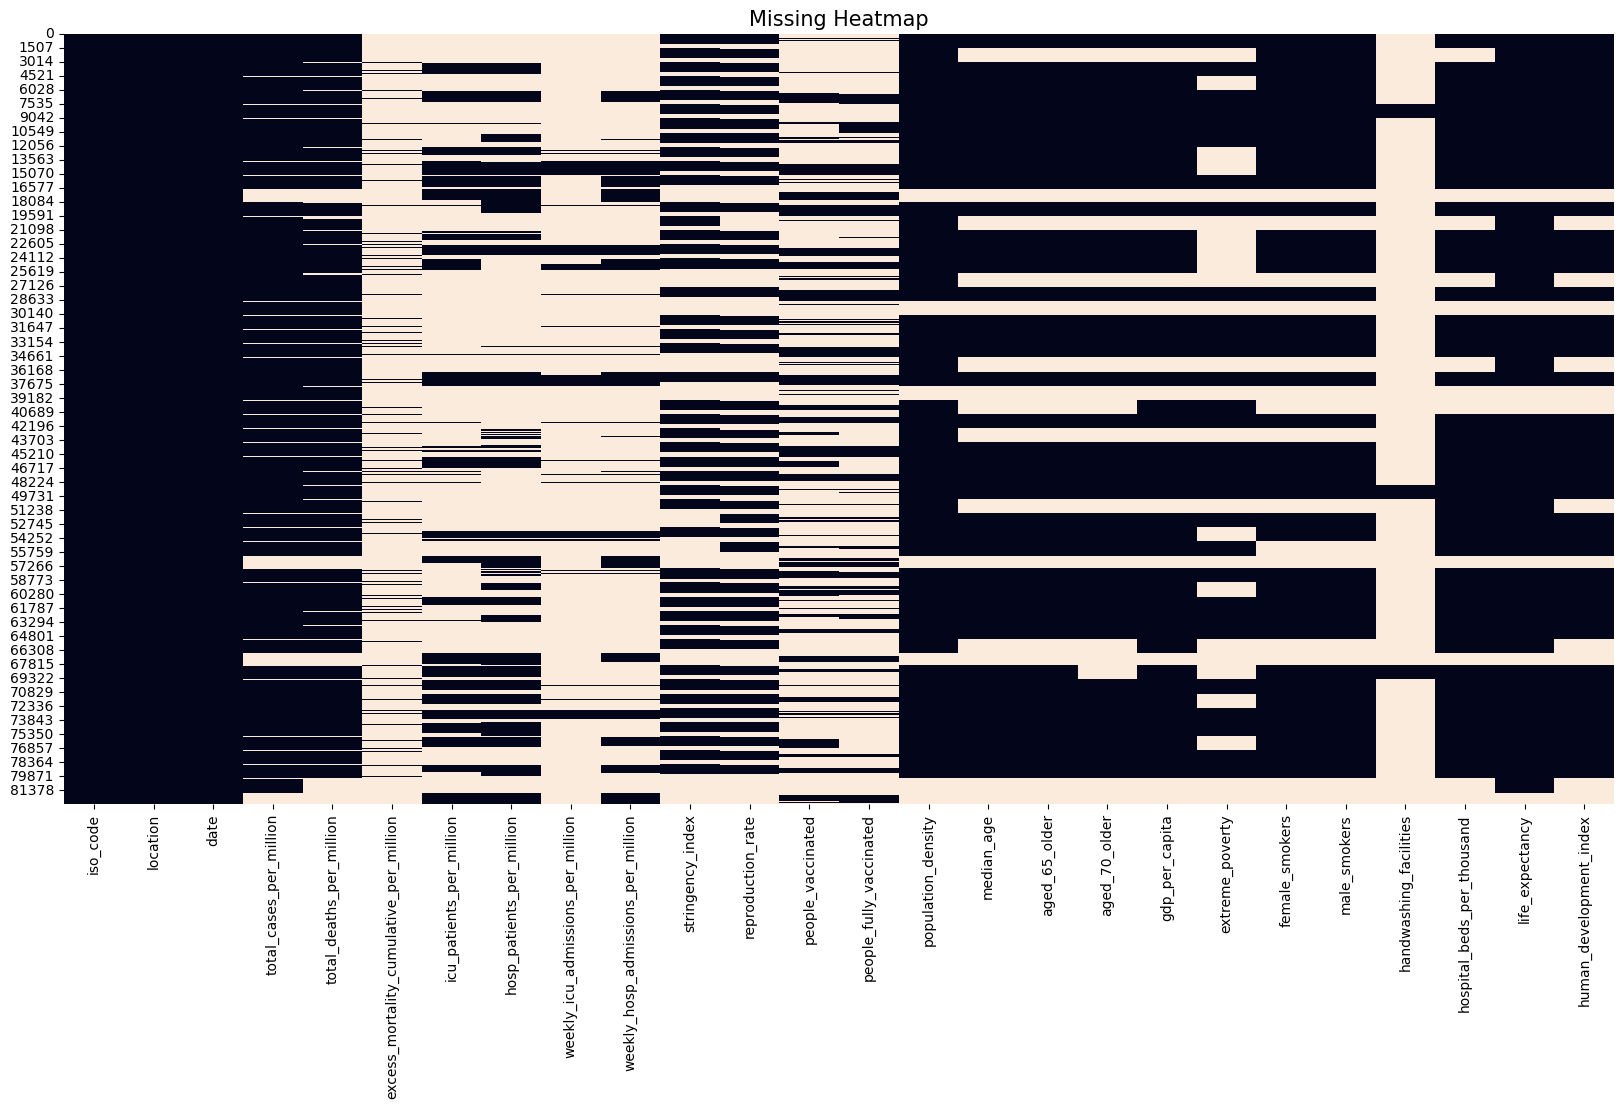

In [14]:
# Creating a heatmap to visualize missing values
plt.figure(figsize=(20, 10)) 
sns.heatmap(europe_data.isna(), cbar=False)
plt.title("Missing Heatmap", fontsize=15)
plt.show()

In [15]:
# Calculating the percentage of missing values for each column
missing_values_percentage = (europe_data.isna().sum() / len(europe_data)) * 100
missing_values_percentage.round(2)

iso_code                                    0.00
location                                    0.00
date                                        0.00
total_cases_per_million                     9.79
total_deaths_per_million                   13.39
excess_mortality_cumulative_per_million    91.33
icu_patients_per_million                   67.86
hosp_patients_per_million                  61.79
weekly_icu_admissions_per_million          90.16
weekly_hosp_admissions_per_million         77.76
stringency_index                           42.00
reproduction_rate                          44.74
people_vaccinated                          69.97
people_fully_vaccinated                    71.08
population_density                         11.82
median_age                                 26.50
aged_65_older                              26.50
aged_70_older                              28.34
gdp_per_capita                             22.83
extreme_poverty                            44.88
female_smokers      

In [16]:
# Selecting columns with less than 50% missing values
columns_to_keep = missing_values_percentage[missing_values_percentage < 50].index

# Update the dataset with selected columns
europe_data = europe_data[columns_to_keep]
europe_data

iso_code location       date  total_cases_per_million  \
0           ALB  Albania 2020-01-05                      NaN   
1           ALB  Albania 2020-01-06                      NaN   
2           ALB  Albania 2020-01-07                      NaN   
3           ALB  Albania 2020-01-08                      NaN   
4           ALB  Albania 2020-01-09                      NaN   
...         ...      ...        ...                      ...   
82836  OWID_WLS    Wales 2021-11-29                      NaN   
82837  OWID_WLS    Wales 2021-11-30                      NaN   
82838  OWID_WLS    Wales 2021-12-01                      NaN   
82839  OWID_WLS    Wales 2021-12-02                      NaN   
82840  OWID_WLS    Wales 2021-12-03                      NaN   

       total_deaths_per_million  stringency_index  reproduction_rate  \
0                           NaN               0.0                NaN   
1                           NaN               0.0                NaN   
2                           NaN               0.0                NaN   
3                           NaN               0.0                NaN   
4                           NaN               0.0                NaN   
...                         ...               ...                ...   
82836                       NaN               NaN                NaN   
82837                       NaN               NaN                NaN   
82838                       NaN               NaN                NaN   
82839                       NaN               NaN                NaN   
82840                       NaN               NaN                NaN   

       population_density  median_age  aged_65_older  aged_70_older  \
0                 104.871        38.0         13.188          8.643   
1                 104.871        38.0         13.188          8.643   
2                 104.871        38.0         13.188          8.643   
3                 104.871        38.0         13.188          8.643   
4                 104.871        38.0         13.188          8.643   
...                   ...         ...            ...            ...   
82836                 NaN         NaN            NaN            NaN   
82837                 NaN         NaN            NaN            NaN   
82838                 NaN         NaN            NaN            NaN   
82839                 NaN         NaN            NaN            NaN   
82840                 NaN         NaN            NaN            NaN   

       gdp_per_capita  extreme_poverty  female_smokers  male_smokers  \
0           11803.431              1.1             7.1          51.2   
1           11803.431              1.1             7.1          51.2   
2           11803.431              1.1             7.1          51.2   
3           11803.431              1.1             7.1          51.2   
4           11803.431              1.1             7.1          51.2   
...               ...              ...             ...           ...   
82836             NaN              NaN             NaN           NaN   
82837             NaN              NaN             NaN           NaN   
82838             NaN              NaN             NaN           NaN   
82839             NaN              NaN             NaN           NaN   
82840             NaN              NaN             NaN           NaN   

       hospital_beds_per_thousand  life_expectancy  human_development_index  
0                            2.89            78.57                    0.795  
1                            2.89            78.57                    0.795  
2                            2.89            78.57                    0.795  
3                            2.89            78.57                    0.795  
4                            2.89            78.57                    0.795  
...                           ...              ...                      ...  
82836                         NaN              NaN                      NaN  
82837                         N

Noting the still substantial presence of missing values, additional data cleaning was conducted, removing countries with variables characterized by more than 10,000 missing values. This allowed to focus on a more relevant subset of European countries, which had a significant amount of data to represent them. From the initial 55 countries, only 40 remained after these cleaning operations.

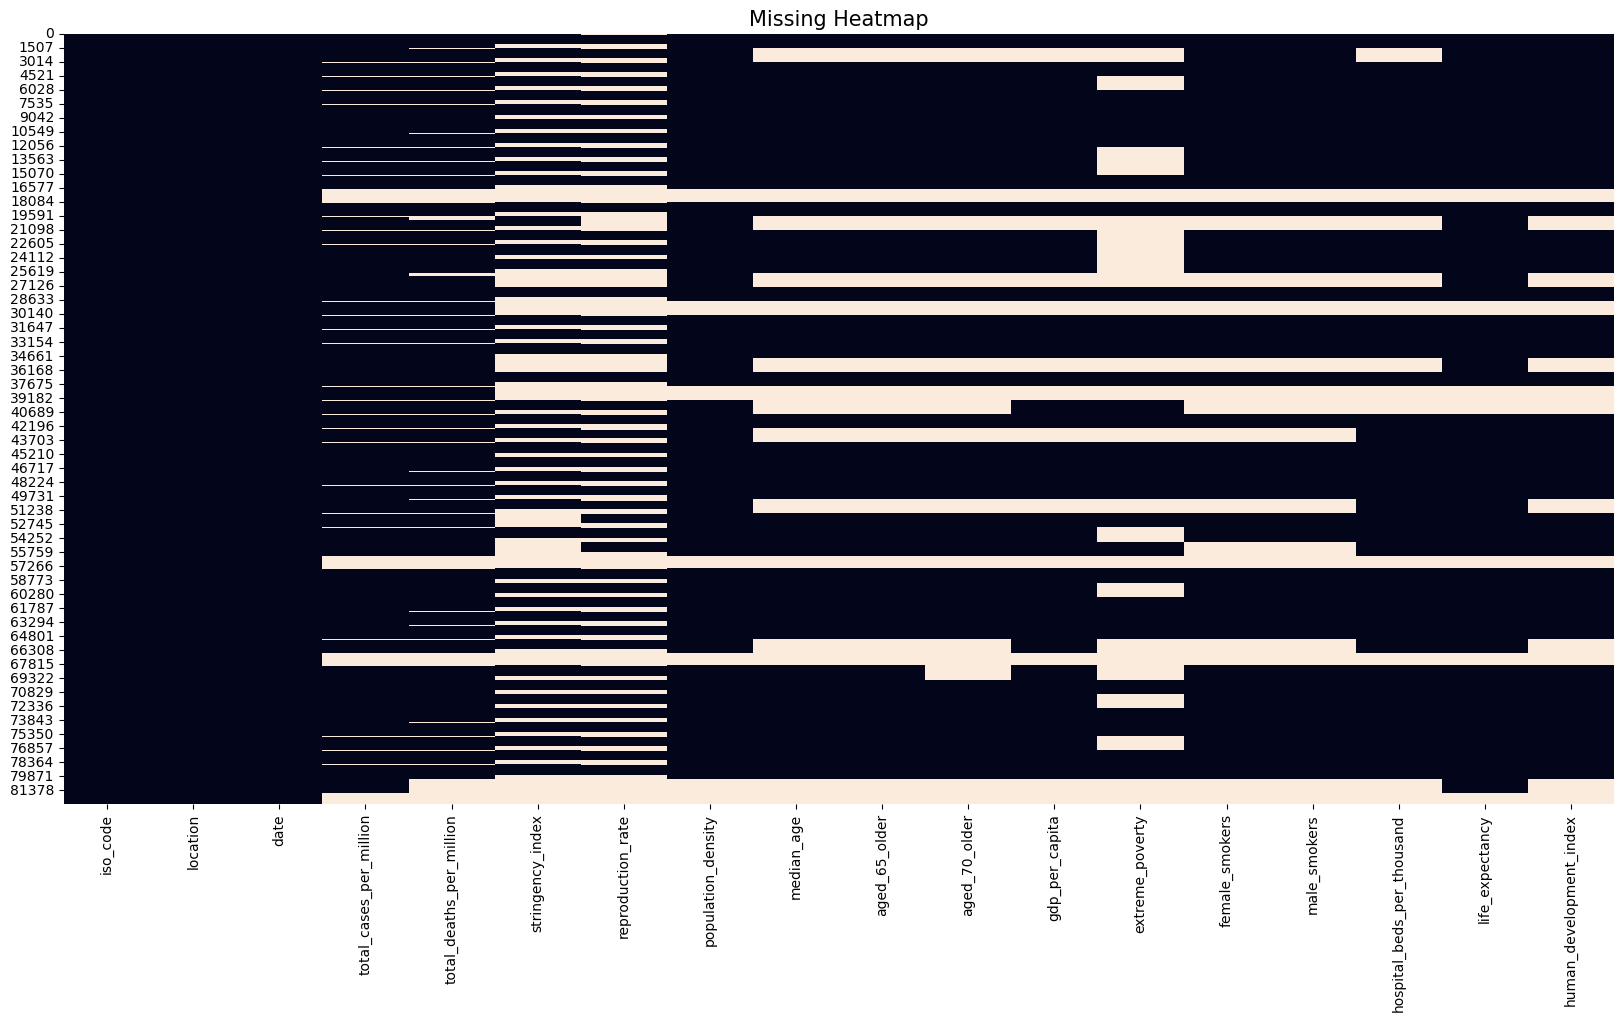

In [17]:
# Visualizing missing values in the filtered dataset
plt.figure(figsize=(20, 10)) 
sns.heatmap(europe_data.isna(), cbar=False)
plt.title("Missing Heatmap", fontsize=15)
plt.show()

In [18]:
# Counting missing values for each country
missing_values_count_list = []

for iso_code in europe_data['iso_code'].unique():
    country_df = europe_data[europe_data['iso_code'] == iso_code]
    missing_values = country_df.drop(['iso_code', 'location'], axis=1).isnull().sum().sum()
    missing_values_country_df = pd.DataFrame({'iso_code': [iso_code], 'missing_values': [missing_values]})
    missing_values_count_list.append(missing_values_country_df)

missing_values_count = pd.concat(missing_values_count_list, ignore_index=True)
print(missing_values_count)

    iso_code  missing_values
0        ALB            1073
1        AND           10192
2        AUT            1046
3        BLR            2607
4        BEL            1021
5        BIH            1072
6        BGR            1111
7        HRV            1062
8        CYP            2608
9        CZE            2650
10       DNK            1046
11  OWID_ENG           20385
12       EST            1064
13       FRO           16062
14       FIN            2532
15       FRA            2521
16       DEU            2431
17       GIB           17098
18       GRC            1093
19       GGY           19914
20       HUN            1071
21       ISL            1034
22       IRL            1050
23       IMN           16888
24       ITA            1021
25       JEY           19914
26  OWID_KOS           13248
27       LVA            1084
28       LIE           11878
29       LTU            1140
30       LUX            1053
31       MLT            1130
32       MDA            1073
33       MCO  

In [19]:
# Filtering out countries with more than 10000 missing values
countries_to_drop = missing_values_count[missing_values_count['missing_values'] > 10000]['iso_code']
europe_data = europe_data[~europe_data['iso_code'].isin(countries_to_drop)]
europe_data.reset_index(drop=True, inplace=True)
europe_data

iso_code        location       date  total_cases_per_million  \
0          ALB         Albania 2020-01-05                      NaN   
1          ALB         Albania 2020-01-06                      NaN   
2          ALB         Albania 2020-01-07                      NaN   
3          ALB         Albania 2020-01-08                      NaN   
4          ALB         Albania 2020-01-09                      NaN   
...        ...             ...        ...                      ...   
60882      GBR  United Kingdom 2022-10-22               368948.549   
60883      GBR  United Kingdom 2022-10-23               368948.549   
60884      GBR  United Kingdom 2022-10-24               368948.549   
60885      GBR  United Kingdom 2022-10-25               368948.549   
60886      GBR  United Kingdom 2022-10-26               368969.317   

       total_deaths_per_million  stringency_index  reproduction_rate  \
0                           NaN               0.0                NaN   
1                           NaN               0.0                NaN   
2                           NaN               0.0                NaN   
3                           NaN               0.0                NaN   
4                           NaN               0.0                NaN   
...                         ...               ...                ...   
60882                  3438.241               NaN                NaN   
60883                  3438.241               NaN                NaN   
60884                  3438.241               NaN                NaN   
60885                  3438.241               NaN                NaN   
60886                  3438.241               NaN                NaN   

       population_density  median_age  aged_65_older  aged_70_older  \
0                 104.871        38.0         13.188          8.643   
1                 104.871        38.0         13.188          8.643   
2                 104.871        38.0         13.188          8.643   
3                 104.871        38.0         13.188          8.643   
4                 104.871        38.0         13.188          8.643   
...                   ...         ...            ...            ...   
60882             272.898        40.8         18.517         12.527   
60883             272.898        40.8         18.517         12.527   
60884             272.898        40.8         18.517         12.527   
60885             272.898        40.8         18.517         12.527   
60886             272.898        40.8         18.517         12.527   

       gdp_per_capita  extreme_poverty  female_smokers  male_smokers  \
0           11803.431              1.1             7.1          51.2   
1           11803.431              1.1             7.1          51.2   
2           11803.431              1.1             7.1          51.2   
3           11803.431              1.1             7.1          51.2   
4           11803.431              1.1             7.1          51.2   
...               ...              ...             ...           ...   
60882       39753.244              0.2            20.0          24.7   
60883       39753.244              0.2            20.0          24.7   
60884       39753.244              0.2            20.0          24.7   
60885       39753.244              0.2            20.0          24.7   
60886       39753.244              0.2            20.0          24.7   

       hospital_beds_per_thousand  life_expectancy  human_development_index  
0                            2.89            78.57                    0.795  
1                            2.89            78.57                    0.795  
2                            2.89            78.57                    0.795  
3                            2.89            78.57                    0.795  
4                            2.89            78.57                    0.795  
...                           ...              ...                      ...  
60882                        2.54   

In [20]:
print(europe_data['location'].unique())
print('Total number of countries:', europe_data['location'].nunique())

['Albania' 'Austria' 'Belarus' 'Belgium' 'Bosnia and Herzegovina'
 'Bulgaria' 'Croatia' 'Cyprus' 'Czechia' 'Denmark' 'Estonia' 'Finland'
 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy'
 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Moldova' 'Montenegro'
 'Netherlands' 'North Macedonia' 'Norway' 'Poland' 'Portugal' 'Romania'
 'Russia' 'Serbia' 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'Switzerland'
 'Ukraine' 'United Kingdom']
Total number of countries: 40


The function interpolate is used to fill missing values in a dataset with estimated values based on the surrounding data points. By applying this function separately for each country (location), interpolation is performed independently for each country's data. This approach makes sense since different countries may have distinct trends and patterns in their data, so interpolating separately for each country helps preserve these unique characteristics. Additionally, when handling temporal data, the interpolate function proves to be beneficial due to its ability to accurately capture and maintain individual characteristics specific to each country.

In [21]:
# Handling missing values using linear interpolation for temporal data

# Define a function for interpolation
def interpolate_group(group):
    # Apply linear interpolation to numerical columns within each group
    group.loc[:, group.select_dtypes(include=['float64']).columns] = group.select_dtypes(include=['float64']).interpolate(method='linear', limit_direction='both')
    return group

# Apply interpolation separately for each country
interpolated_df = europe_data.copy()
interpolated_df = interpolated_df.groupby('location').apply(interpolate_group)

# Reset index to remove the 'location' index level
interpolated_df.reset_index(drop=True, inplace=True)
interpolated_df

iso_code        location       date  total_cases_per_million  \
0          ALB         Albania 2020-01-05                   11.610   
1          ALB         Albania 2020-01-06                   11.610   
2          ALB         Albania 2020-01-07                   11.610   
3          ALB         Albania 2020-01-08                   11.610   
4          ALB         Albania 2020-01-09                   11.610   
...        ...             ...        ...                      ...   
60882      GBR  United Kingdom 2022-10-22               368948.549   
60883      GBR  United Kingdom 2022-10-23               368948.549   
60884      GBR  United Kingdom 2022-10-24               368948.549   
60885      GBR  United Kingdom 2022-10-25               368948.549   
60886      GBR  United Kingdom 2022-10-26               368969.317   

       total_deaths_per_million  stringency_index  reproduction_rate  \
0                         0.352              0.00               1.15   
1                         0.352              0.00               1.15   
2                         0.352              0.00               1.15   
3                         0.352              0.00               1.15   
4                         0.352              0.00               1.15   
...                         ...               ...                ...   
60882                  3438.241              5.56               0.30   
60883                  3438.241              5.56               0.30   
60884                  3438.241              5.56               0.30   
60885                  3438.241              5.56               0.30   
60886                  3438.241              5.56               0.30   

       population_density  median_age  aged_65_older  aged_70_older  \
0                 104.871        38.0         13.188          8.643   
1                 104.871        38.0         13.188          8.643   
2                 104.871        38.0         13.188          8.643   
3                 104.871        38.0         13.188          8.643   
4                 104.871        38.0         13.188          8.643   
...                   ...         ...            ...            ...   
60882             272.898        40.8         18.517         12.527   
60883             272.898        40.8         18.517         12.527   
60884             272.898        40.8         18.517         12.527   
60885             272.898        40.8         18.517         12.527   
60886             272.898        40.8         18.517         12.527   

       gdp_per_capita  extreme_poverty  female_smokers  male_smokers  \
0           11803.431              1.1             7.1          51.2   
1           11803.431              1.1             7.1          51.2   
2           11803.431              1.1             7.1          51.2   
3           11803.431              1.1             7.1          51.2   
4           11803.431              1.1             7.1          51.2   
...               ...              ...             ...           ...   
60882       39753.244              0.2            20.0          24.7   
60883       39753.244              0.2            20.0          24.7   
60884       39753.244              0.2            20.0          24.7   
60885       39753.244              0.2            20.0          24.7   
60886       39753.244              0.2            20.0          24.7   

       hospital_beds_per_thousand  life_expectancy  human_development_index  
0                            2.89            78.57                    0.795  
1                            2.89            78.57                    0.795  
2                            2.89            78.57                    0.795  
3                            2.89            78.57                    0.795  
4                            2.89            78.57                    0.795  
...                           ...              ...                      ...  
60882                        2.54   

In [22]:
# Displaying the number of missing values after interpolation
print('Number of missing values:')
for col in interpolated_df.columns:
    print('\t%s: %d' % (col,interpolated_df[col].isna().sum()))

Number of missing values:
	iso_code: 0
	location: 0
	date: 0
	total_cases_per_million: 0
	total_deaths_per_million: 0
	stringency_index: 3040
	reproduction_rate: 0
	population_density: 0
	median_age: 0
	aged_65_older: 0
	aged_70_older: 1520
	gdp_per_capita: 0
	extreme_poverty: 16742
	female_smokers: 1520
	male_smokers: 1520
	hospital_beds_per_thousand: 0
	life_expectancy: 0
	human_development_index: 0


The "extreme_poverty" variable has been removed from the dataset due to a still significant number of missing values. Additionally, many insights related to extreme poverty are already captured within the Human Development Index (HDI), which provides a more comprehensive measure of poverty indicators. Afterwards, it was chosen to drop the remaining missing values using the dropna() method.

Thus, in conclusion, the final tidy dataset contains approximately 55,000 observations, covering a time window from 2020 to the beginning of 2024 and containing 14 numerical features directly related to the pandemic contention for 37 European countries.

In [23]:
interpolated_df = interpolated_df.drop(columns=['extreme_poverty'])
interpolated_df = interpolated_df.dropna().reset_index(drop=True)
interpolated_df

iso_code        location       date  total_cases_per_million  \
0          ALB         Albania 2020-01-05                   11.610   
1          ALB         Albania 2020-01-06                   11.610   
2          ALB         Albania 2020-01-07                   11.610   
3          ALB         Albania 2020-01-08                   11.610   
4          ALB         Albania 2020-01-09                   11.610   
...        ...             ...        ...                      ...   
56322      GBR  United Kingdom 2022-10-22               368948.549   
56323      GBR  United Kingdom 2022-10-23               368948.549   
56324      GBR  United Kingdom 2022-10-24               368948.549   
56325      GBR  United Kingdom 2022-10-25               368948.549   
56326      GBR  United Kingdom 2022-10-26               368969.317   

       total_deaths_per_million  stringency_index  reproduction_rate  \
0                         0.352              0.00               1.15   
1                         0.352              0.00               1.15   
2                         0.352              0.00               1.15   
3                         0.352              0.00               1.15   
4                         0.352              0.00               1.15   
...                         ...               ...                ...   
56322                  3438.241              5.56               0.30   
56323                  3438.241              5.56               0.30   
56324                  3438.241              5.56               0.30   
56325                  3438.241              5.56               0.30   
56326                  3438.241              5.56               0.30   

       population_density  median_age  aged_65_older  aged_70_older  \
0                 104.871        38.0         13.188          8.643   
1                 104.871        38.0         13.188          8.643   
2                 104.871        38.0         13.188          8.643   
3                 104.871        38.0         13.188          8.643   
4                 104.871        38.0         13.188          8.643   
...                   ...         ...            ...            ...   
56322             272.898        40.8         18.517         12.527   
56323             272.898        40.8         18.517         12.527   
56324             272.898        40.8         18.517         12.527   
56325             272.898        40.8         18.517         12.527   
56326             272.898        40.8         18.517         12.527   

       gdp_per_capita  female_smokers  male_smokers  \
0           11803.431             7.1          51.2   
1           11803.431             7.1          51.2   
2           11803.431             7.1          51.2   
3           11803.431             7.1          51.2   
4           11803.431             7.1          51.2   
...               ...             ...           ...   
56322       39753.244            20.0          24.7   
56323       39753.244            20.0          24.7   
56324       39753.244            20.0          24.7   
56325       39753.244            20.0          24.7   
56326       39753.244            20.0          24.7   

       hospital_beds_per_thousand  life_expectancy  human_development_index  
0                            2.89            78.57                    0.795  
1                            2.89            78.57                    0.795  
2                            2.89            78.57                    0.795  
3                            2.89            78.57                    0.795  
4                            2.89            78.57                    0.795  
...                           ...              ...                      ...  
56322                        2.54            81.32                    0.932  
56323                        2.54            81.32                    0.932  
56324                        2.54            81.32                    0.932  
56325 

In [24]:
print(interpolated_df['location'].unique())
print('Total number of countries:', interpolated_df['location'].nunique())

['Albania' 'Austria' 'Belarus' 'Belgium' 'Bosnia and Herzegovina'
 'Bulgaria' 'Croatia' 'Cyprus' 'Czechia' 'Denmark' 'Estonia' 'Finland'
 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy'
 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Moldova' 'Netherlands'
 'Norway' 'Poland' 'Portugal' 'Romania' 'Russia' 'Slovakia' 'Slovenia'
 'Spain' 'Sweden' 'Switzerland' 'Ukraine' 'United Kingdom']
Total number of countries: 37


## Data Visualization

In this context, data visualisation can be useful for understanding the spread of the pandemic, identifying trends and geographical variations, and assessing the effectiveness of control measures. To this end, various visualisation techniques will be applied in the following section to try to obtain an initial idea of the situation.

### Interactive Map

To begin with, the first graph is an interactive map visualising the monthly incidence of total COVID-19 cases per million inhabitants in European countries over the period 2020-2024. This type of visualisation is extremely useful in providing a clear and immediate overview. It facilitates the understanding of the spread of the pandemic in time and space, allowing observers to identify areas with high infection rates, monitor the evolution of the situation over the years and identify any geographical or temporal patterns. 

In [25]:
map_data = interpolated_df.loc[:, ['location', 'date', 'total_cases_per_million']]
map_data['year_month'] = map_data['date'].dt.to_period('M')
map_data.sort_values(by='year_month', inplace=True)

monthly_average = map_data.groupby(['location', 'year_month'])['total_cases_per_million'].mean().reset_index().round()

# buckets to facilitate visualization
monthly_average['cases_bucket'] = pd.qcut(monthly_average['total_cases_per_million'], q=5, labels=False)

fig = px.choropleth(
    monthly_average,
    locations="location",
    locationmode="country names",
    color="cases_bucket",
    animation_frame="year_month",
    title="Monthly Incidence of Total Cases per Million Residents (2020-2023) - European Countries",
    labels={'cases_bucket': 'Cases Bucket'},
    color_continuous_scale="inferno_r"
)

fig.update_geos(projection_type="natural earth")

fig.update_geos(
    lataxis_range=[30, 85],
    lonaxis_range=[-25, 75],
    showcountries=True,
    countrycolor="white"
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    height=600,
    legend=dict(
        font=dict(size=10)
    )
)

fig.show()

### Time Series

To analyse the trend of the pandemic, time series graphs were constructed, in particular, three metrics were chosen, their monthly averages calculated across all countries and then plotted. 

The graph is then divided into three parts:

- The first subplot (left) displays the total cases per million, which seem to fluctuate considerably over the time period considered.

- The second subplot (centre) represents total deaths per million, which seem to follow a similar trend to total cases per million, but with lower values.

- The third subplot (right) illustrates the trend in the index of the severity of restrictive measures taken by governments, which seems to be inversely correlated with total cases and deaths per million.

Overall, the time series graph suggests a possible relationship between the severity index and the spread of the disease. Periods with a higher severity index seem to coincide with fewer total cases and deaths per million, and vice versa.

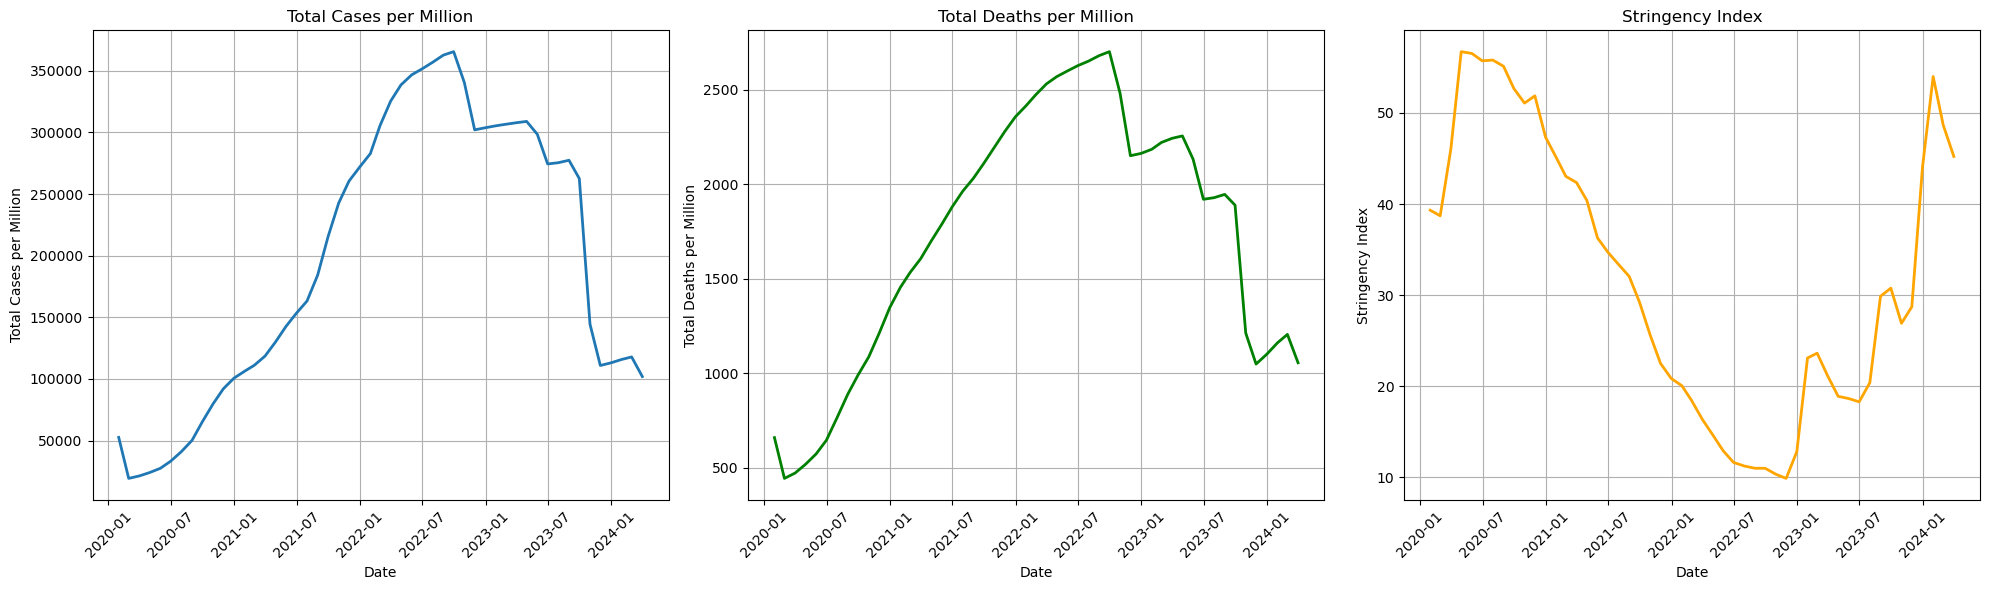

In [26]:
monthly_avg = interpolated_df.drop(columns=['iso_code', 'location']).resample('M', on='date').mean().reset_index()
columns_to_plot = ['total_cases_per_million', 'stringency_index', 'total_deaths_per_million']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

axes[0].plot(monthly_avg['date'], monthly_avg['total_cases_per_million'], label='Total Cases', linewidth=2)
axes[0].set_title('Total Cases per Million')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total Cases per Million')
axes[0].grid(True)
axes[0].tick_params(axis='x', rotation=45)

axes[1].plot(monthly_avg['date'], monthly_avg['total_deaths_per_million'], color='green', label='Total Deaths', linewidth=2)
axes[1].set_title('Total Deaths per Million')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Total Deaths per Million')
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)

axes[2].plot(monthly_avg['date'], monthly_avg['stringency_index'], color='orange', label='Stringency Index', linewidth=2)
axes[2].set_title('Stringency Index')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Stringency Index')
axes[2].grid(True)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The same principle applies to the plot below, whose purpose is to display the trend of the same measures across the various months of the year. It can be noted here, too, that as the stringency index decreases, the number of cases tends to increase. In addition to this, the restraining measures seem to have a decreasing trend going towards the summer months. opposite trend for total cases and deaths. This may be attributable to the fact that the summer months offer more opportunities for people to come into contact with each other and this may influence a more rapid spread of the virus.

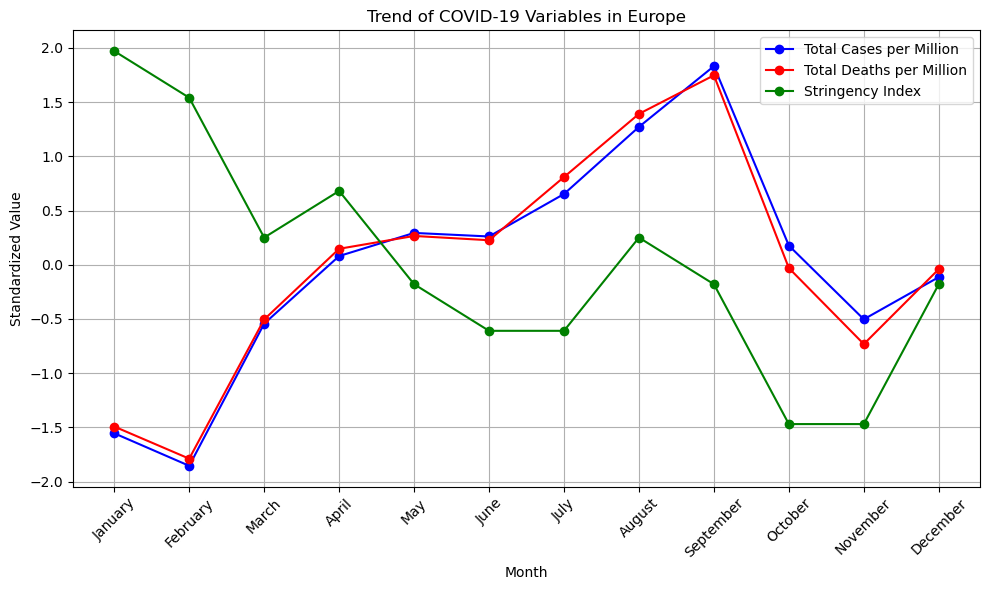

In [27]:
monthly_data = interpolated_df.loc[:, ['date', 'total_cases_per_million', 'stringency_index', 'total_deaths_per_million']]
monthly_data['month'] = interpolated_df['date'].dt.month
monthly_data.sort_values(by='month', inplace=True)

monthly_average = monthly_data.drop(columns=['date']).groupby('month').mean().reset_index().round()

# Monthly average data
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
confirmed_cases = monthly_average['total_cases_per_million'] 
deaths = monthly_average['total_deaths_per_million']
stringency_index = monthly_average['stringency_index']

# Standardization of data using z-score normalization
standardized_cases = (confirmed_cases - np.mean(confirmed_cases)) / np.std(confirmed_cases)
standardized_deaths = (deaths - np.mean(deaths)) / np.std(deaths)
standardized_stringency_index = (stringency_index - np.mean(stringency_index)) / np.std(stringency_index)

plt.figure(figsize=(10, 6))
plt.plot(months, standardized_cases, marker='o', color='blue', label='Total Cases per Million')
plt.plot(months, standardized_deaths, marker='o', color='red', label='Total Deaths per Million')
plt.plot(months, standardized_stringency_index, marker='o', color='green', label='Stringency Index')

plt.xlabel('Month')
plt.ylabel('Standardized Value')
plt.title('Trend of COVID-19 Variables in Europe')
plt.legend()

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Correlation Heatmap

Concluding this section of data visualisation is a representation of the correlation matrix. The graph in question is characterised by a heatmap showing the correlations between different numerical variables in the dataset, calculated through Pearson's correlation coefficient. This coefficient varies between -1 and 1, where:

- 1 indicates a perfect positive correlation,
- -1 indicates a perfect negative correlation,
- 0 indicates no correlation. 

This plot supports the identification of significant patterns and relationships between variables, the understanding of their mutual influences and the analysis and decision-making based on the data with immediate visual information.

The variable with the most significant correlation with the total number of cases appears to be the stringency index. In fact, these two variables show a negative correlation of 60%, indicating that an increase in the stringency index is associated with a decrease in the total number of cases. This relationship will be examined in more detail in the next part of the analysis.

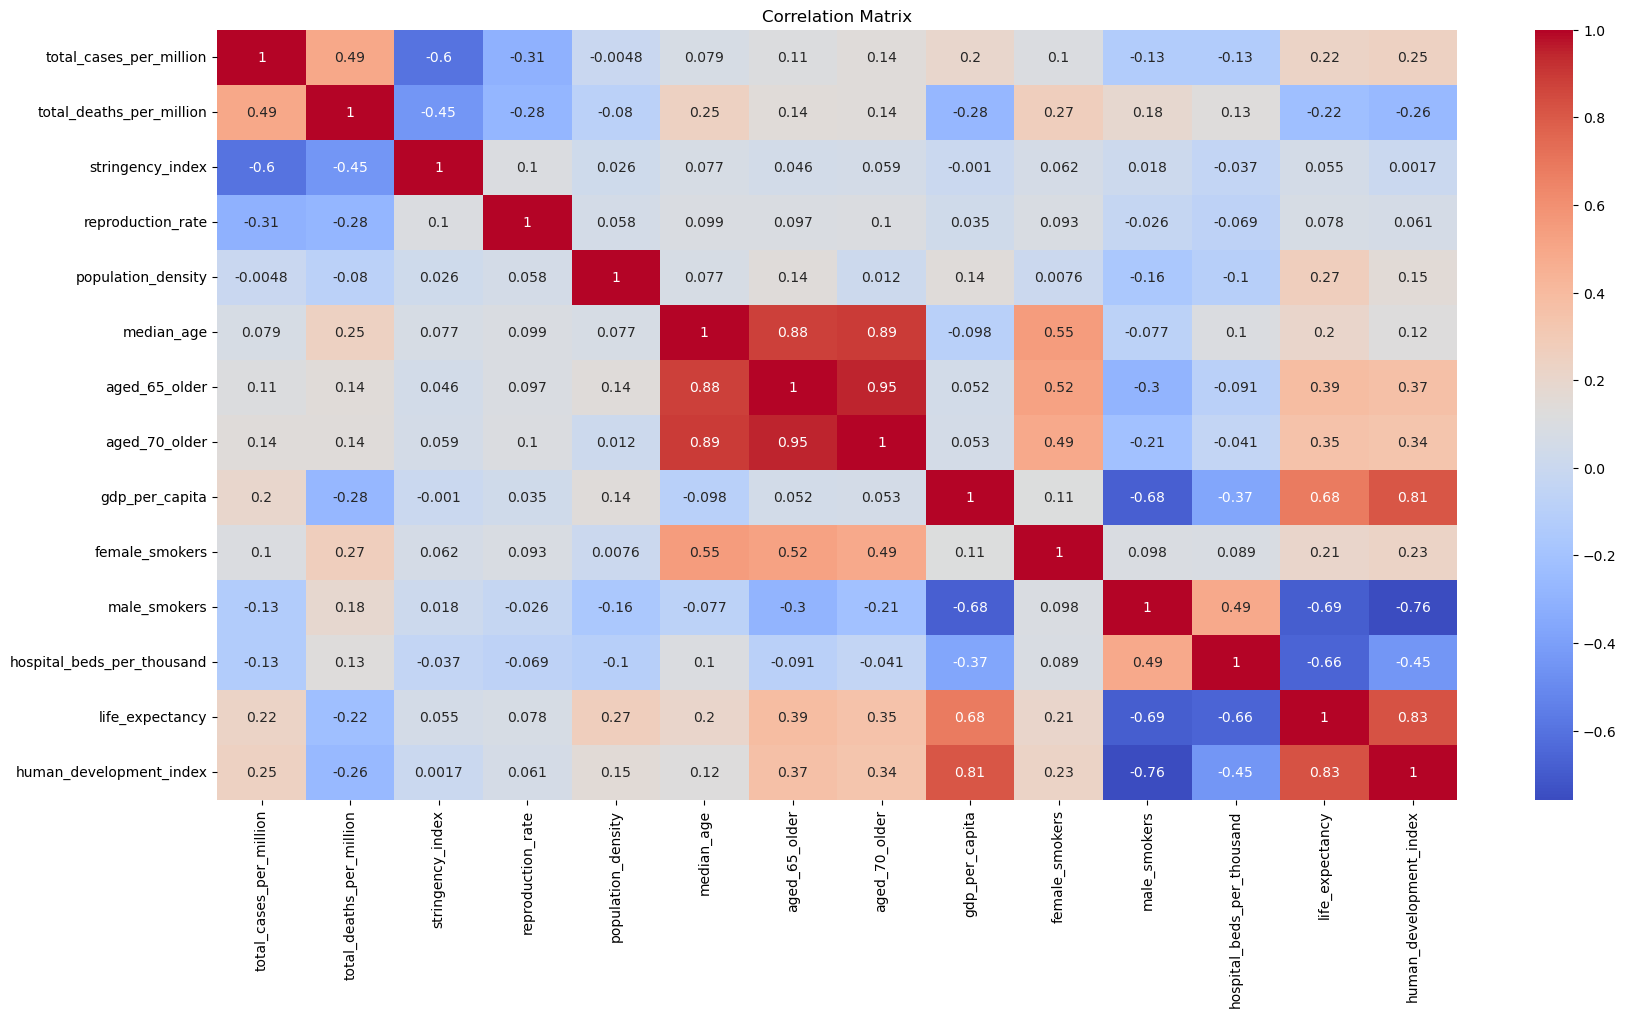

In [28]:
correlation_matrix = interpolated_df.select_dtypes(include='number').corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Linear Regression

To further investigate the previously mentioned relationship between total cases and the severity of containment measures, a linear regression was performed using the stringency index as the independent variable and the total number of cases per million as the dependent variable. In order to evaluate the model's performance, the data was split into a training set (70%) and a test set (30%).

The linear regression yielded an $R^2$ score of approximately 13.97%, indicating that the model is able to explain only a small portion of the variability in the data. The visualization of the model clearly shows the general trend, but the low R² suggests that other factors might significantly influence the total COVID-19 cases. This was expected given the complexity of the phenomenon, whose explanation cannot be attributed to a single factor.

In [29]:
stringency_cases_average = interpolated_df.groupby(['stringency_index'])[['total_cases_per_million']].mean().reset_index()
stringency_cases_average

stringency_index  total_cases_per_million
0                 0.00            131569.107451
1                 2.78                 0.809709
2                 5.56            333372.352213
3                 8.33            119784.826357
4                 9.26            161962.701781
...                ...                      ...
2414             90.74              2288.830881
2415             92.59               539.770630
2416             93.52              2982.817955
2417             94.44               850.006000
2418             96.30               278.564171

[2419 rows x 2 columns]

In [30]:
# Feature/regressor (X) and target variable (y)
X = stringency_cases_average.loc[:, ['stringency_index']].values
y = stringency_cases_average['total_cases_per_million'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# training = 70% of points
# testing = 30% of points

In [31]:
X

array([[ 0.  ],
       [ 2.78],
       [ 5.56],
       ...,
       [93.52],
       [94.44],
       [96.3 ]])

In [32]:
y

array([1.31569107e+05, 8.09709302e-01, 3.33372352e+05, ...,
       2.98281795e+03, 8.50006000e+02, 2.78564171e+02])

In [33]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [34]:
# Predictions
y_pred = lin_reg.predict(X_test)

# R-squared
R2_score = r2_score(y_test, y_pred)
print("Simple Linear Regression R2 Score: {:.2f}%".format(R2_score * 100))

Simple Linear Regression R2 Score: 13.97%


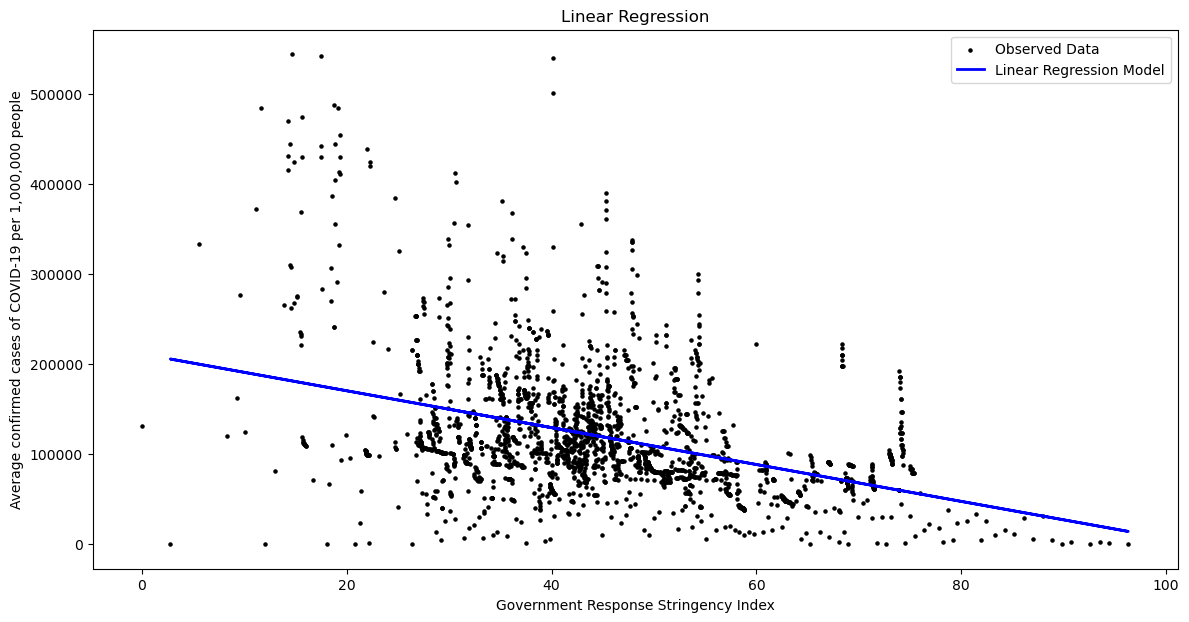

In [35]:
# Visualizing Linear Regression result
plt.figure(figsize=(14, 7))
plt.scatter(X, y, color='black', s=5, label='Observed Data')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Linear Regression Model')
plt.legend()
plt.xlabel('Government Response Stringency Index')
plt.ylabel('Average confirmed cases of COVID-19 per 1,000,000 people')
plt.title('Linear Regression')
plt.show()

## Polynomial Regression

To improve the model, a polynomial regression with varying degrees of complexity was applied, from 1 to 10, which offers greater flexibility in capturing the non-linearities present in the data. Using cross-validation and GridSearchCV, it was determined that the optimal polynomial grade is 8. This model produced an $R^2$ score of 15.44%, slightly better than simple linear regression, suggesting a greater ability to adapt to the observed data. The polynomial regression display shows how the model more accurately captures fluctuations in data than the linear model. 

The process of determining the optimal polynomial degree underscored the importance of striking a balance between model complexity and the risk of overfitting. Leveraging GridSearchCV ensured a robust evaluation of the best model, considering various possible configurations.

Moreover, a visual examination of Mean Squared Error (MSE) and $R^2$ scores supported the selection of the optimal degree, affirming that a degree of 8 yields the lowest MSE and the highest $R^2$ value.

In [36]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

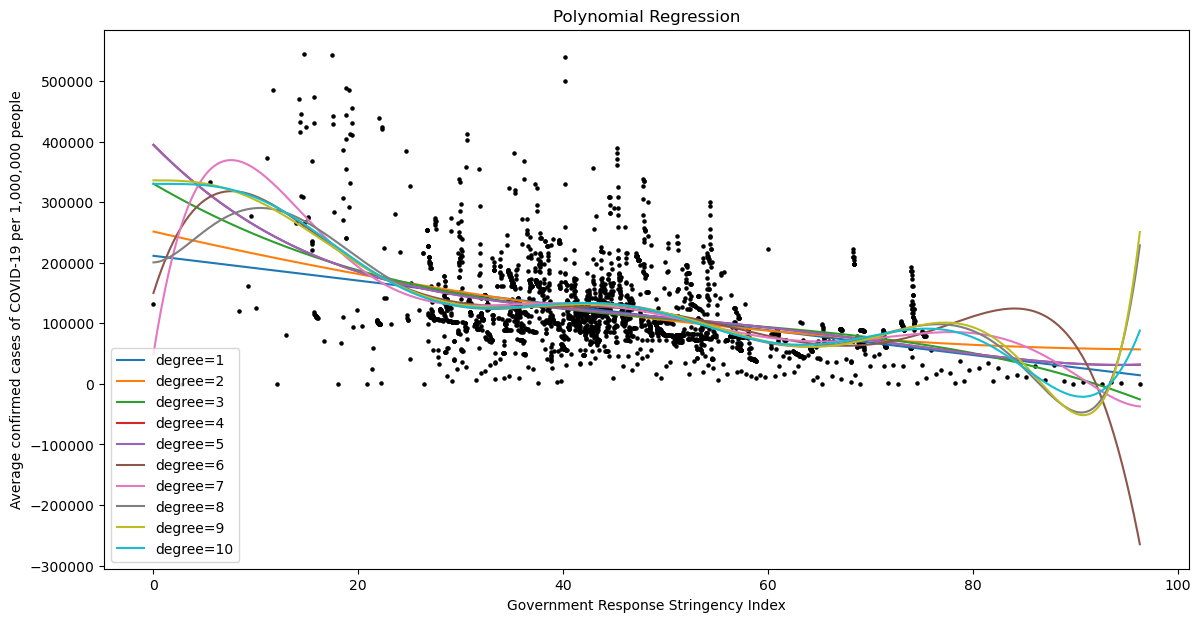

In [37]:
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

plt.figure(figsize=(14, 7))
degrees = np.arange(1, 11)

for degree in degrees:
    y_pred = PolynomialRegression(degree).fit(X_train, y_train).predict(X_range)
    plt.plot(X_range.ravel(), y_pred, label='degree={0}'.format(degree))

plt.scatter(X, y, color='black', s=5)
plt.xlabel('Government Response Stringency Index')
plt.ylabel('Average confirmed cases of COVID-19 per 1,000,000 people')
plt.title('Polynomial Regression')
plt.legend(loc='best')
plt.show()

In [38]:
# Dompute MSE and R-squared
MSE = []
R2_score = []

for degree in degrees:
    y_pred = PolynomialRegression(degree).fit(X_train, y_train).predict(X_test)
    MSE.append(mean_squared_error(y_test, y_pred))
    R2_score.append(r2_score(y_test, y_pred))

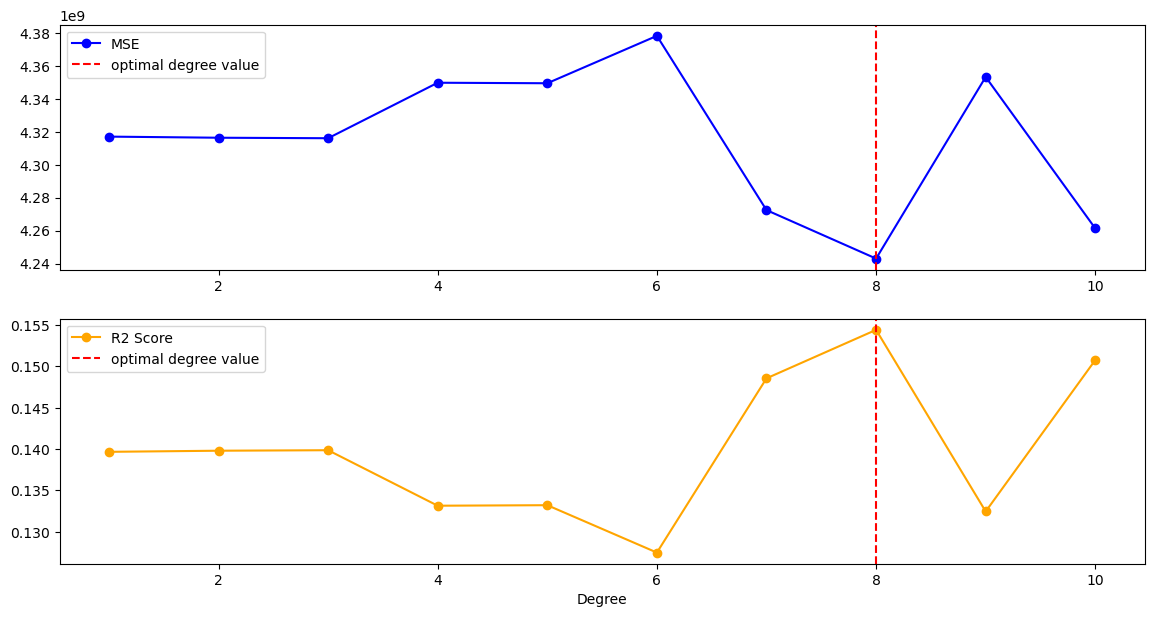

In [39]:
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(degrees, MSE, color='blue', marker='o', label='MSE')
plt.axvline(x=(MSE.index(min(MSE)) + 1), color='red', linestyle='--', label='optimal degree value')
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.plot(degrees, R2_score, color='orange', marker='o', label='R2 Score')
plt.xlabel('Degree')
plt.axvline(x=(R2_score.index(max(R2_score)) + 1), color='red', linestyle='--', label='optimal degree value')
plt.legend(loc='best')

In [40]:
# Determine the optimal degree_value
if MSE.index(min(MSE)) == R2_score.index(max(R2_score)):
    optimal_degree = MSE.index(min(MSE)) + 1
    print("The optimal degree value is", optimal_degree, "with an R2 of {:.2f}%".format(R2_score[optimal_degree-1] * 100))

The optimal degree value is 8 with an R2 of 15.44%


{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 8}


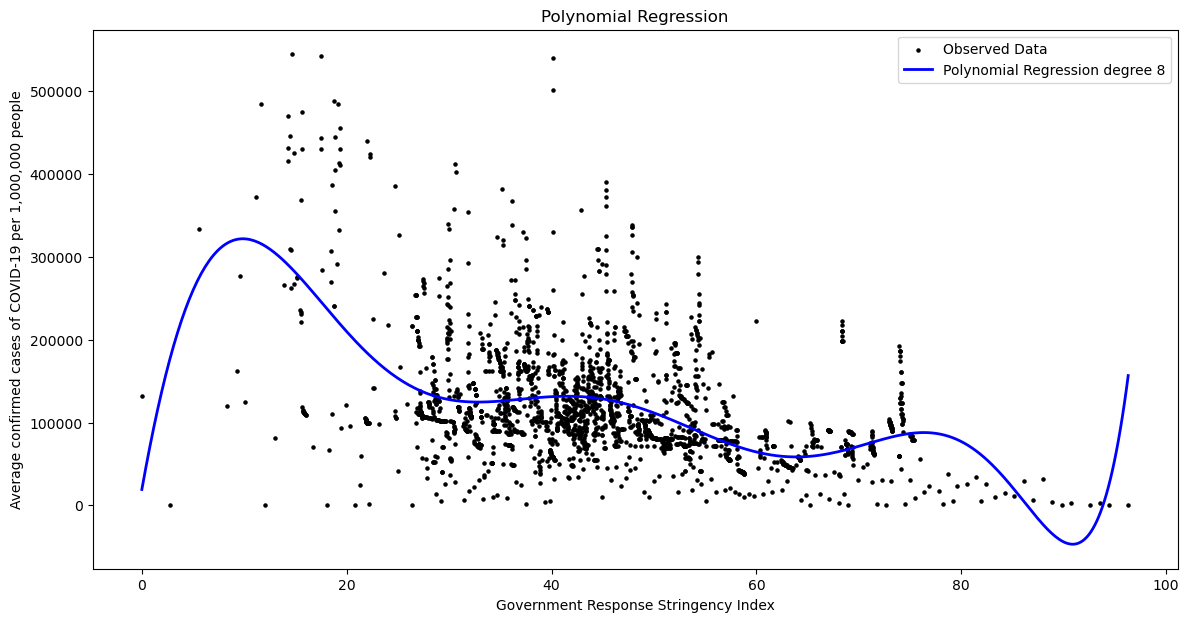

In [41]:
# Find optimal degree value with GridSearchCV
plt.figure(figsize=(14, 7))
param_grid = {'polynomialfeatures__degree': np.arange(1, 11),
              'linearregression__fit_intercept': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=5)

grid.fit(X_train, y_train)
print(grid.best_params_)

model = grid.best_estimator_
plt.scatter(X, y, color='black', s=5, label='Observed Data')
lim = plt.axis()

y_test = model.fit(X_train, y_train).predict(X_range)
plt.plot(X_range.ravel(), y_test, color='blue', linewidth=2, 
         label=f'Polynomial Regression degree {grid.best_params_["polynomialfeatures__degree"]}')

plt.xlabel('Government Response Stringency Index')
plt.ylabel('Average confirmed cases of COVID-19 per 1,000,000 people')
plt.title('Linear Regression - COVID-19 Cases vs Stringency Index')
plt.title('Polynomial Regression')
plt.legend(loc='best')
plt.show()

The analysis using linear and polynomial regression revealed a negative relationship between the stringency index and the total cases of COVID-19 per million inhabitants. Although the models showed a limited ability to explain the variability in the data, polynomial regression provided a slightly more accurate representation than simple linear regression. These results indicate that stricter containment measures are generally associated with fewer confirmed cases, supporting the importance of government pandemic response policies.

## Feature Ranking

Feature ranking analysis is critical in the data modeling process, as it helps identify the most influential variables in predicting the phenomenon of interest. In this context, three distinct approaches have been adopted: 

1. **Univariate Selection**: This approach evaluates each feature independently of the target variable using statistical measures such as the F-score. It provides an indication of the force of the relationship between each characteristic and the output variable.

2. **Feature Importance with Random Forest**: This method involves using a Random Forest algorithm to determine the relative importance of each characteristic in the model. It evaluates the contribution of each variable to the reduction of the model prediction error, allowing to identify the most influential features.

3. **Recursive Feature Elimination (RFE) with Lasso**: This technique uses L1 regularization to iteratively select the most important features, eliminating the less relevant ones.

In [42]:
X = interpolated_df.drop(columns=['iso_code', 'location', 'date', 'total_cases_per_million'])
y = interpolated_df['total_cases_per_million']

In [43]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

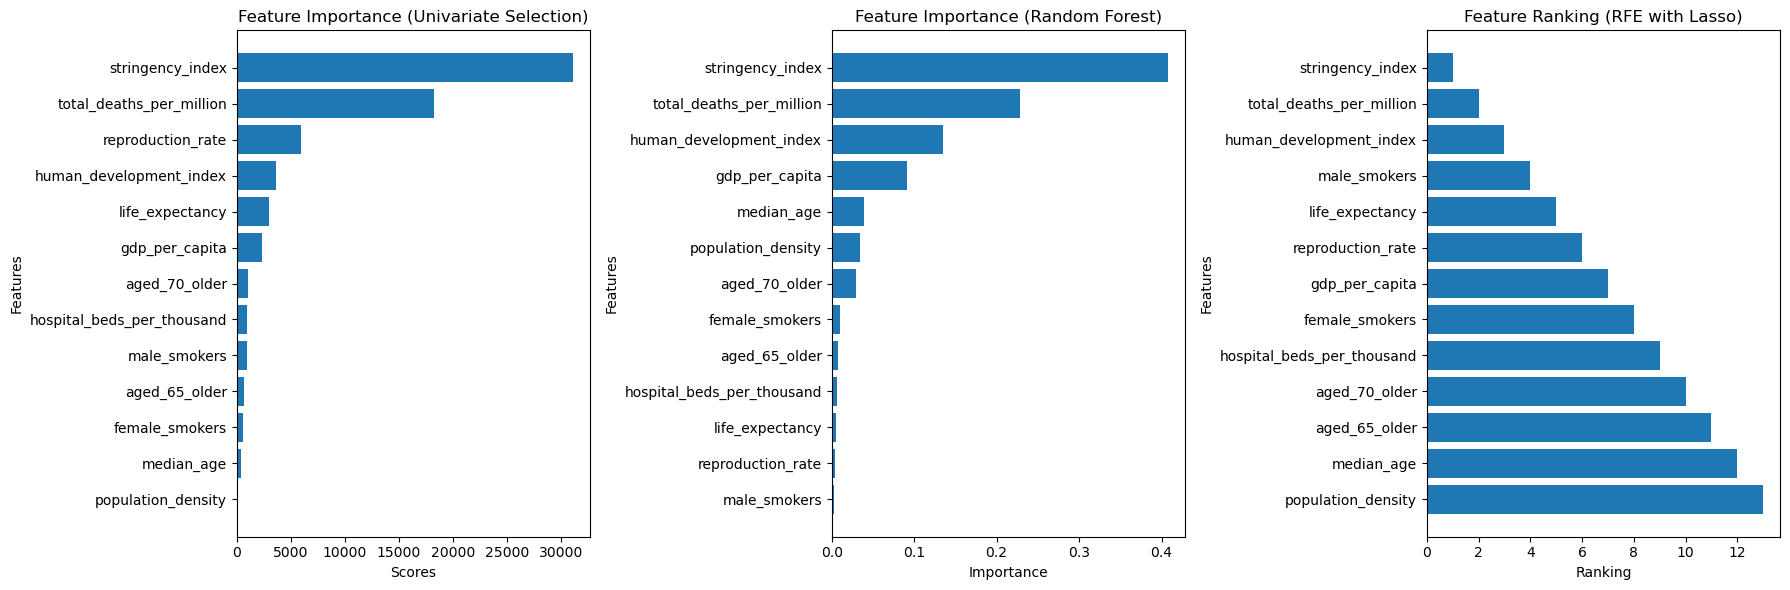

In [44]:
# Method 1: Univariate Selection
select_k_best = SelectKBest(score_func=f_regression, k='all')
select_k_best.fit(X_scaled, y)
scores = select_k_best.scores_

# Method 2: Feature Importance with Random Forest
model_rf = RandomForestRegressor()
model_rf.fit(X_scaled, y)
importances = model_rf.feature_importances_

# Method 3: Recursive Feature Elimination (RFE) with Lasso
model_lasso = LassoCV()
rfe = RFE(model_lasso, n_features_to_select=1)
rfe.fit(X_scaled, y)
ranking = rfe.ranking_

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sorted_indices = np.argsort(scores)
axes[0].barh(np.array(X.columns)[sorted_indices], np.array(scores)[sorted_indices])
axes[0].set_xlabel('Scores')
axes[0].set_ylabel('Features')
axes[0].set_title('Feature Importance (Univariate Selection)')

sorted_indices = np.argsort(importances)
axes[1].barh(np.array(X.columns)[sorted_indices], np.array(importances)[sorted_indices])
axes[1].set_xlabel('Importance')
axes[1].set_ylabel('Features')
axes[1].set_title('Feature Importance (Random Forest)')

sorted_indices = np.argsort(ranking)[::-1]
axes[2].barh(np.array(X.columns)[sorted_indices], np.array(ranking)[sorted_indices])
axes[2].set_xlabel('Ranking')
axes[2].set_ylabel('Features')
axes[2].set_title('Feature Ranking (RFE with Lasso)')

plt.tight_layout()
plt.show()

It is worth noting that the stringency index consistently emerges as the foremost feature in all three rankings. This suggests that the extent of containment measures plays a pivotal role in determining the spread of COVID-19 cases.

In addition to the stringency index, other notable features include the reproduction rate, human development index, and life expectancy. These variables represent crucial determinants of a population's susceptibility to the virus and its capacity to effectively respond to the pandemic.

Interestingly, population density is highlighted as one of the most influential features solely in the ranking derived from the random forest method. This observation underscores the interplay between population density and various factors such as transmission rates and the challenges associated with implementing social distancing measures.

### Ridge and Lasso Regression

To comprehend the dynamics of total COVID-19 cases and identify the most influential variables in the phenomenon, Ridge and Lasso Regression models were applied. These models provide further insights into the relationships between independent features and the target variable, representing the relative weight of each feature in the prediction process.

Before model training, the data was split into training (70%) and test (30%) sets, and features were standardized to ensure consistency. Subsequently, through the utilization of GridSearchCV, the optimal value for the regularization parameter, known as alpha, was sought, which prevents overfitting by penalizing coefficients of excessively large variables.

The analysis of coefficients in Ridge and Lasso models enabled the extraction of valuable insights into the most influential variables in total COVID-19 cases. It was revealed that features such as mortality per million inhabitants or HDI have a significant and positive impact, while the stringency index exhibits a strong negative impact, indicating that stricter control measures are associated with a reduction in confirmed cases.

Best alpha for Ridge: 3.088843596477485
Best alpha for Lasso: 1.9306977288832496


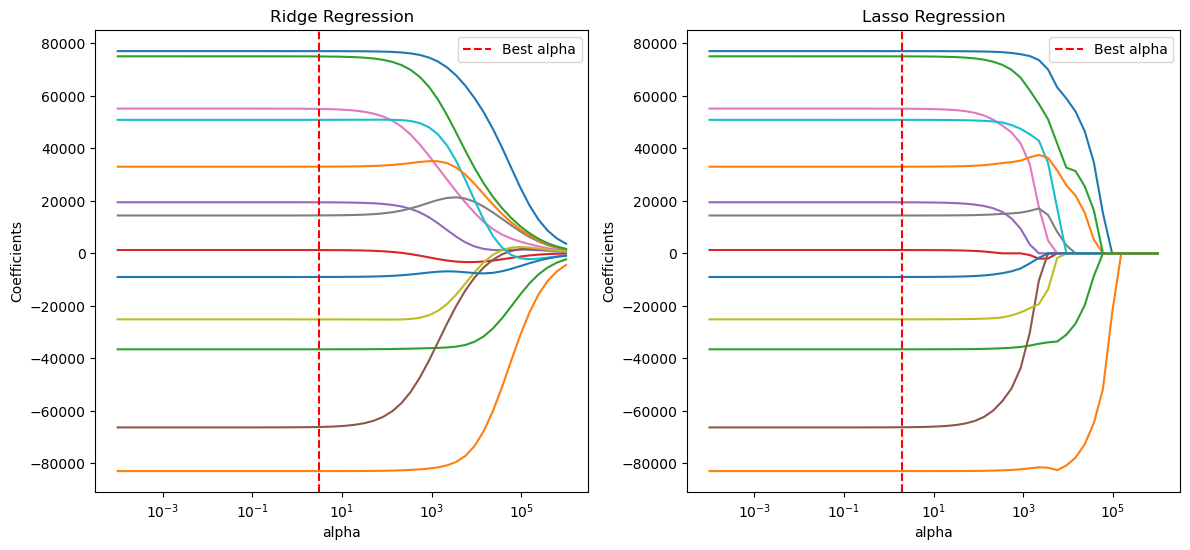

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Parameter grid
alpha_values = np.logspace(-4, 6, 50)

# Ridge Regression with GridSearchCV
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, param_grid={'alpha': alpha_values}, cv=5)
ridge_grid.fit(X_train_scaled, y_train)

# Lasso Regression with GridSearchCV
lasso = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso, param_grid={'alpha': alpha_values}, cv=5)
lasso_grid.fit(X_train_scaled, y_train)

best_ridge = ridge_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_

print(f"Best alpha for Ridge: {ridge_grid.best_params_['alpha']}")
print(f"Best alpha for Lasso: {lasso_grid.best_params_['alpha']}")

# Plot the coefficients for different alphas
coefs_ridge = []
coefs_lasso = []

for a in alpha_values:
    ridge.set_params(alpha=a)
    lasso.set_params(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    lasso.fit(X_train_scaled, y_train)
    coefs_ridge.append(ridge.coef_)
    coefs_lasso.append(lasso.coef_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(alpha_values, coefs_ridge)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Regression')
plt.axvline(ridge_grid.best_params_['alpha'], linestyle='--', color='r', label='Best alpha')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(alpha_values, coefs_lasso)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Regression')
plt.axvline(lasso_grid.best_params_['alpha'], linestyle='--', color='r', label='Best alpha')
plt.legend()

plt.show()

In [46]:
feature_names = X_train.columns.tolist()

# Best model coefficients
coef_dict = {
    'Feature': feature_names,
    'Ridge Coefficients': best_ridge.coef_,
    'Lasso Coefficients': best_lasso.coef_
}
coefs_df = pd.DataFrame(coef_dict)
coefs_df.set_index('Feature', inplace=True)
coefs_df

Ridge Coefficients  Lasso Coefficients
Feature                                                           
total_deaths_per_million          77039.543800        77043.488677
stringency_index                 -82967.874985       -82971.339260
reproduction_rate                -36556.283873       -36557.108575
population_density                 1243.494697         1254.589398
median_age                        19442.415838        19446.235056
aged_65_older                    -66155.980061       -66259.498030
aged_70_older                     55028.543227        55112.753552
gdp_per_capita                    14453.839349        14424.790910
female_smokers                   -25161.542357       -25152.576091
male_smokers                      50873.554625        50863.261094
hospital_beds_per_thousand        -9000.336384        -9003.559348
life_expectancy                   33030.387866        33020.512221
human_development_index           75016.368738        75049.223679

### Random Forest Regression

As mentioned above, the analysis of coefficients in the Ridge and Lasso Regression models provides a further understanding of the relationships between the independent variables and the target variable. However, these models do not explicitly take into account the interactions between variables. This is where the Random Forest Regression comes in, offering another approach to feature selection and data prediction.

The Random Forest Regression makes an implicit selection of the characteristics, since it considers only a subset of the characteristics at each split of the tree. This process makes it possible to identify the most influential features in the context of COVID-19 total case prediction.

In [47]:
numBaseClassifiers = 500
maxdepth = 20

rf = RandomForestRegressor(n_estimators=numBaseClassifiers, max_depth=maxdepth, random_state=0)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=20, n_estimators=500, random_state=0)

#### Comparisons

Building upon the analysis of Ridge and Lasso models, predictions are now generated using these models along with a Random Forest model on both training and test data. The results are then evaluated in terms of the coefficient of determination ($R^2$), mean squared error (MSE), and mean absolute error (MAE) for each model. These values provide a measure of how well the models fit the data and their ability to generalize.

Upon reviewing the results, it is observed that the Random Forest model exhibits the highest coefficient of determination on both training and test data, indicating greater adaptability. However, significant disparities between performance on training and test data suggest potential overfitting of the Random Forest model. This hypothesis is supported by the notably lower MSE and MAE values for Random Forest compared to Ridge and Lasso models, particularly on the training data.

These findings suggest that while Random Forest may have superior fitting capability to the training data, it may not generalize well to new data. In contrast, regularized Ridge and Lasso models appear to be more robust and generalizable. This conclusion is supported by the fact that despite slightly lower ($R^2$) coefficients, Ridge and Lasso models exhibit greater consistency between results on training and test data, indicating enhanced generalization ability.

In [48]:
# Predictions
ridge_train_pred = best_ridge.predict(X_train_scaled)
ridge_test_pred = best_ridge.predict(X_test_scaled)

lasso_train_pred = best_lasso.predict(X_train_scaled)
lasso_test_pred = best_lasso.predict(X_test_scaled)

rf_train_pred = rf.predict(X_train_scaled)
rf_test_pred = rf.predict(X_test_scaled)

# R-squared
ridge_train_r2 = r2_score(y_train, ridge_train_pred)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)

lasso_train_r2 = r2_score(y_train, lasso_train_pred)
lasso_test_r2 = r2_score(y_test, lasso_test_pred)

rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)

# MSE and MAE
ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)

lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)

rf_train_mse = mean_squared_error(y_train, rf_train_pred)
rf_test_mse = mean_squared_error(y_test, rf_test_pred)

ridge_train_mae = mean_absolute_error(y_train, ridge_train_pred)
ridge_test_mae = mean_absolute_error(y_test, ridge_test_pred)

lasso_train_mae = mean_absolute_error(y_train, lasso_train_pred)
lasso_test_mae = mean_absolute_error(y_test, lasso_test_pred)

rf_train_mae = mean_absolute_error(y_train, rf_train_pred)
rf_test_mae = mean_absolute_error(y_test, rf_test_pred)

metrics_data = {
    'Model': ['Ridge Regression (Train)', 'Ridge Regression (Test)', 
              'Lasso Regression (Train)', 'Lasso Regression (Test)',
              'Random Forest (Train)', 'Random Forest (Test)'],
    'R-squared': [ridge_train_r2, ridge_test_r2, lasso_train_r2, lasso_test_r2, rf_train_r2, rf_test_r2],
    'MSE': [ridge_train_mse, ridge_test_mse, lasso_train_mse, lasso_test_mse, rf_train_mse, rf_test_mse],
    'MAE': [ridge_train_mae, ridge_test_mae, lasso_train_mae, lasso_test_mae, rf_train_mae, rf_test_mae]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

Model  R-squared           MSE           MAE
0  Ridge Regression (Train)   0.618561  1.484414e+10  94991.508107
1   Ridge Regression (Test)   0.611601  1.481191e+10  94793.336223
2  Lasso Regression (Train)   0.618561  1.484414e+10  94992.071059
3   Lasso Regression (Test)   0.611602  1.481187e+10  94793.972237
4     Random Forest (Train)   0.999981  7.462927e+05    225.051385
5      Random Forest (Test)   0.999947  2.012459e+06    367.423008

## Principal Component Analysis

The analysis proceeds with Principal Component Analysis (PCA), a technique aimed at reducing the dimensionality of the original dataset by generating new variables known as principal components. The main objective of this phase is to identify which and how many principal components can capture the majority of the variance present in the original data, thus facilitating analysis and improving the effectiveness of predictive models.

The variance explained by each principal component is graphically displayed, indicating the contribution of each component to the overall variation in the data. As shown, PC1 explains approximately 32.46% of the total variation in the data, followed by PC2 with around 22.74%, and so forth. The bar graph clearly illustrates the decrease in explained variance as one moves towards lower principal components.

The second graph depicts the cumulative proportion of explained variance relative to the number of principal components. It is observed that the first two components explain approximately 55% of the variation, while the first three explain about 67%, and so on. This graph aids in determining the number of principal components to select in order to retain a significant amount of information, balancing dimensionality reduction with preservation of variation in the data.

As illustrated, the first eight principal components account for the majority of the variance observed. Given that there is no significant improvement in the amount of additional information provided beyond the eighth component, only these initial eight components were included in the model construction. Subsequently, a linear regression model was developed, utilizing the total number of cases as the dependent variable and the eight principal components as regressors. Yielding an $R^2$ of around 55%, this suggests that this model is able to explain slightly more than half of the variance in the original data.

Principal Components:
             PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      3.448808  2.206704  0.123304  0.662258  0.904475  1.856561 -0.334957   
1      3.448808  2.206704  0.123304  0.662258  0.904475  1.856561 -0.334957   
2      3.448808  2.206704  0.123304  0.662258  0.904475  1.856561 -0.334957   
3      3.448808  2.206704  0.123304  0.662258  0.904475  1.856561 -0.334957   
4      3.448808  2.206704  0.123304  0.662258  0.904475  1.856561 -0.334957   
...         ...       ...       ...       ...       ...       ...       ...   
56322 -1.064215  0.742045 -2.463546  0.337230 -0.798046  0.670403 -0.282067   
56323 -1.064215  0.742045 -2.463546  0.337230 -0.798046  0.670403 -0.282067   
56324 -1.064215  0.742045 -2.463546  0.337230 -0.798046  0.670403 -0.282067   
56325 -1.064215  0.742045 -2.463546  0.337230 -0.798046  0.670403 -0.282067   
56326 -1.064215  0.742045 -2.463546  0.337230 -0.798046  0.670403 -0.282067   

            PC8       PC9   

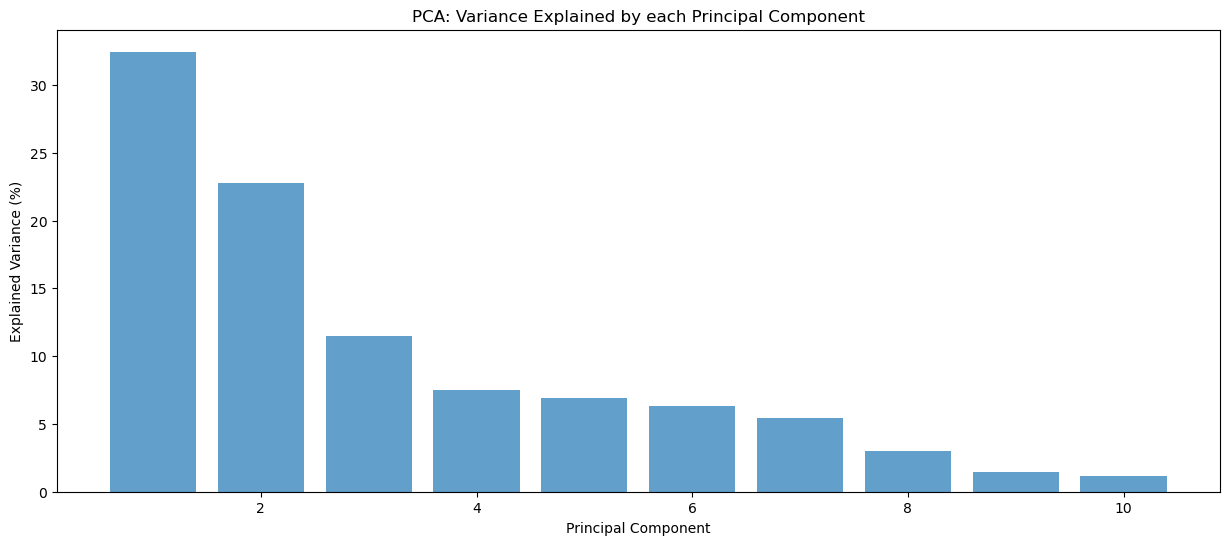

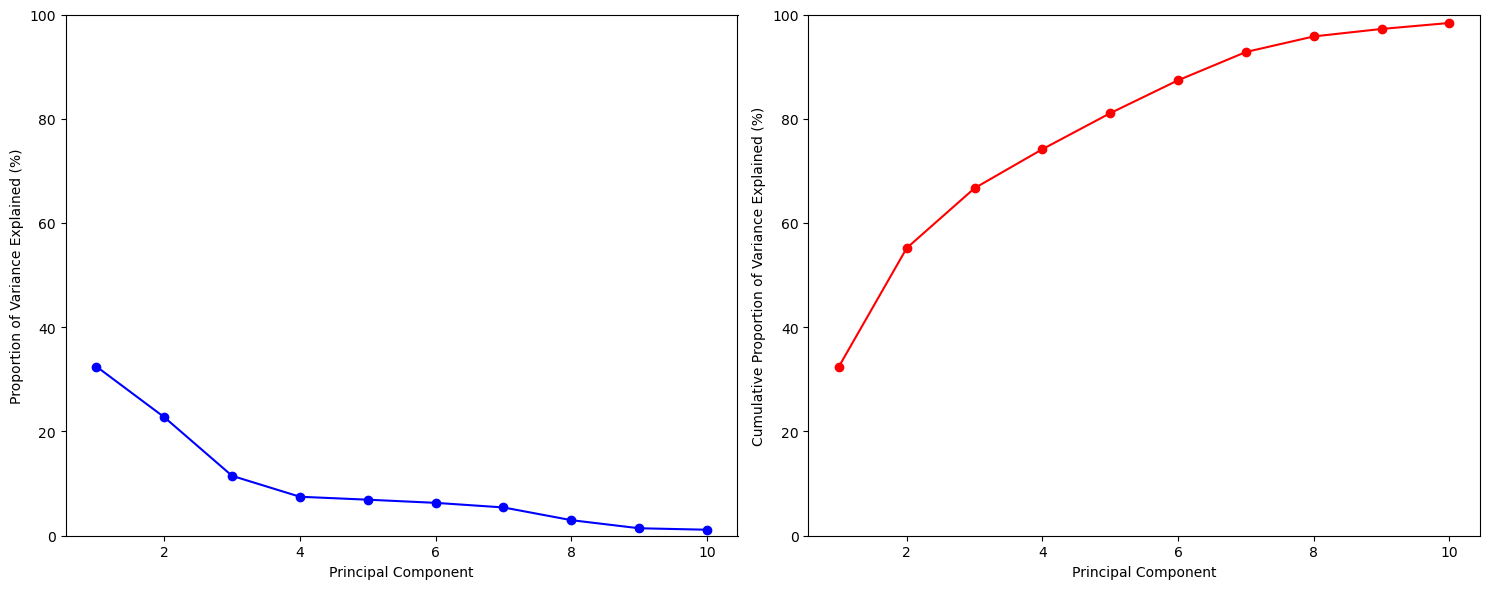

In [49]:
pca = PCA(n_components=10)
principal_components = pca.fit_transform(X_scaled)

principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 11)])

print("Principal Components:\n", principal_df)
print("\nVariance explained by each principal component (%):", pca.explained_variance_ratio_ * 100)

plt.figure(figsize=(15, 6))
plt.bar(range(1, 11), pca.explained_variance_ratio_ * 100, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('PCA: Variance Explained by each Principal Component')
plt.show()

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio_percent = explained_variance_ratio * 100

# Cumulative explained variance ratios
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
cumulative_explained_variance_ratio_percent = cumulative_explained_variance_ratio * 100

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), explained_variance_ratio_percent, marker='o', color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained (%)')
plt.ylim(0, 100)

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), cumulative_explained_variance_ratio_percent, marker='o', color='red')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Proportion of Variance Explained (%)')
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(principal_df.iloc[:, :8], y, test_size=0.3, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

R2_score = r2_score(y_test, y_pred)
print("R-squared (Simple Linear Regression using the first 8 principal components): {:.2f}%".format(R2_score * 100))

R-squared (Simple Linear Regression using the first 8 principal components): 55.68%


If in the initial phase of Principal Component Analysis (PCA) the total cases variable was excluded because it served as the response variable for the developing model, now, for a more comprehensive overview, all variables have been incorporated into the analysis. Specifically, data from 2021 was selected due to its complete annual coverage, representing the pandemic's second year—a period marked by rapid changes. Consequently, these data offer a representative snapshot of the context. The goal remains to utilize PCA to distill the data into a two-dimensional representation, identifying the variables that distinguish between different countries.

In doing so, the dataset is first prepared by excluding unnecessary instances and then standardized to ensure that all variables are on the same scale, a prerequisite for PCA. After standardization, PCA is performed with the aim of reducing the dimensionality of the dataset while preserving its variability. Here, only two principal components are retained for visualization purposes. These principal components represent new axes in the feature space, capturing the directions of maximum variance in the data.

The resulting principal components are then used to create a biplot, a visualization technique that combines a scatter plot of the data points with arrows indicating the direction and magnitude of each variable's contribution to the principal components. Each data point represents a country, positioned based on its scores on the two principal components. The arrows indicate the direction in which each variable has the highest variability, helping to interpret the relationships between variables and countries in the reduced dimensional space.

This biplot provides a comprehensive overview of the dataset, highlighting the variables that contribute most significantly to the observed differences among countries. By examining the position of countries relative to each other and the direction of variable arrows, it is possible gain insights into the underlying factors driving variations in COVID-19 dynamics across different regions.

In [51]:
data_2021 = interpolated_df[interpolated_df['date'].dt.year == 2021].drop(columns=['iso_code', 'date'])
data_2021 = data_2021.groupby('location').mean().reset_index()
data_2021.set_index('location', inplace=True)

# Standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_2021)

data_2021_standardized = pd.DataFrame(scaled_features, index=data_2021.index, columns=data_2021.columns)
data_2021_standardized

total_cases_per_million  total_deaths_per_million  \
location                                                                    
Albania                               -1.089345                 -1.063317   
Austria                               -0.862988                 -0.512343   
Belarus                               -1.119568                 -1.547532   
Belgium                               -0.684730                  0.192933   
Bosnia and Herzegovina                -0.974601                  0.808688   
Bulgaria                              -0.962302                  0.685426   
Croatia                               -0.753169                 -0.066129   
Cyprus                                -0.742789                 -1.457023   
Czechia                               -0.214312                  0.678127   
Denmark                               -1.087682                 -1.482057   
Estonia                                0.324327                 -0.594691   
Finland                               -0.789873                 -1.473322   
France                                 0.305238                  0.061921   
Germany                               -0.425626                 -0.538403   
Greece                                -0.223598                  0.027182   
Hungary                               -0.421331                  1.763023   
Iceland                               -0.040377                 -1.741454   
Ireland                               -0.110002                 -0.699949   
Italy                                 -0.268263                  0.478000   
Latvia                                 0.198300                  0.409188   
Lithuania                              0.360302                  0.472383   
Luxembourg                             0.115886                 -0.912504   
Malta                                 -0.682750                 -0.911775   
Moldova                               -0.563953                  0.780445   
Netherlands                            0.335986                 -0.774213   
Norway                                 0.149735                 -1.430153   
Poland                                -0.361788                  0.772184   
Portugal                               1.532201                  0.218246   
Romania                               -0.368754                  1.235655   
Russia                                -0.572025                  0.479116   
Slovakia                               1.298409                  1.719596   
Slovenia                               3.429647                  2.103149   
Spain                                  0.936560                  0.539929   
Sweden                                 0.630015                  0.124387   
Switzerland                            2.570077                 -0.338820   
Ukraine                               -0.380084                  0.784599   
United Kingdom                         1.513227                  1.209506   

                        stringency_index  reproduction_rate  \
location                                                      
Albania                         0.957055           0.073826   
Austria                         1.796914           0.057422   
Belarus                         0.032881          -0.127895   
Belgium                         1.055259           0.778182   
Bosnia and Herzegovina          0.325276           0.438819   
Bulgaria                        0.944469           0.240944   
Croatia                         0.508752           0.130215   
Cyprus                          1.704083           0.341420   
Czechia                         1.428409           0.241713   
Denmark                         0.874312           0.232742   
Estonia                        -0.080621           0.126371   
Finland                        -0.299976           0.688984   
France                          0.177812           0.401141   
Germany                         0.355988           1.101139   
Greece      

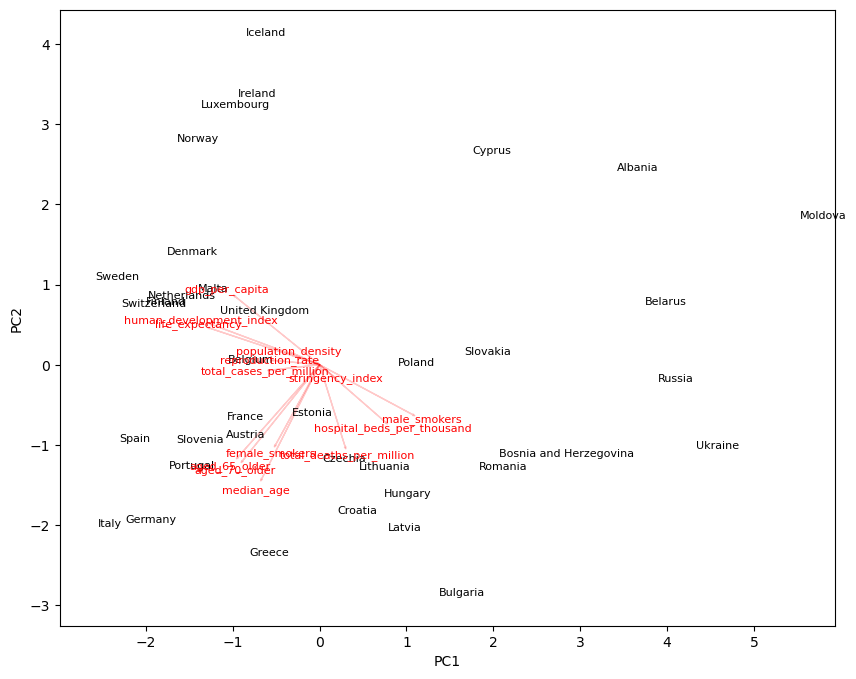

In [52]:
pca = PCA(n_components=2)  # only 2 principal components for visualization
principal_components = pca.fit_transform(data_2021_standardized)

plt.figure(figsize=(10, 8))
for i, country in enumerate(data_2021_standardized.index):
    plt.scatter(principal_components[i, 0], principal_components[i, 1], alpha=0)
    plt.text(principal_components[i, 0], principal_components[i, 1], country, color='black', fontsize=8, ha='left', va='bottom')
for i, var in enumerate(data_2021_standardized.columns):
    plt.arrow(0, 0, pca.components_[0, i]*3, pca.components_[1, i]*3, color='red', alpha=0.2, head_width=0.02)
    plt.text(pca.components_[0, i]*3.3, pca.components_[1, i]*3.3, var, color='red', ha='center', va='center', fontsize=8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Clustering

Building upon the last point addressed in the PCA section, the analysis seeks to partition countries into groups sharing similar characteristics. This section explores clustering methods, employing both hierarchical clustering and KMeans clustering to segment the dataset into distinct groups.

Initially, hierarchical clustering is applied using various linkage methods (complete, single, and average). Dendrograms resulting from this process visualize the hierarchical relationships between countries, based on their feature similarities.

Subsequently, both hierarchical and KMeans clustering solutions are generated with the number of clusters set to 4, a choice informed by both the dendrogram analysis (for hierarchical clustering) and the elbow and silhouette method (for KMeans). Mean values of variables within each cluster are then calculated for both clustering methods. Looking at the values it is possible to gain some insights into the variables that characterize each cluster.

A comparative visualization of the cluster assignments overlays countries' positions in the principal component space derived from PCA. This facilitates the assessment of how well the clustering algorithms group countries with similar characteristics. The final plot illustrates that while both methods share similarities, they also present differences in how countries are distributed across clusters. This indicates that the selection of a clustering method can impact data interpretation. Hierarchical clustering tends to segregate countries based on more pronounced disparities, while k-means clustering demonstrates a smoother distribution.

To gauge the effectiveness of these methods, the Adjusted Rand Index (ARI) is utilized, providing a quantitative measure of similarity between the two clustering solutions while considering chance associations.

The Adjusted Rand Index (ARI) ranges from -1 to 1, where:

- ARI = 1 indicates perfect agreement between the two clustering solutions.
- ARI close to 0 suggests random cluster assignments.
- ARI = -1 indicates complete discordance between the two clustering solutions.

The calculated Adjusted Rand Index (ARI) value between the hierarchical clustering and KMeans clustering solutions yielded 0.27. This moderate ARI value suggests a slight association between the cluster assignments generated by the two methods. 

The disparity in results between K-means and hierarchical clustering could be attributed to their distinct methodologies. K-means partitions data into k clusters based on randomly initialized centroids, while hierarchical clustering constructs a cluster hierarchy without specifying the number of clusters. Additionally, K-means tends to favor spherical clusters and is more sensitive to outliers, whereas hierarchical clustering can accommodate clusters of arbitrary shapes. The selection of an appropriate k value is crucial for K-means, often requiring multiple runs for stability, whereas hierarchical clustering offers a broader perspective on clustering albeit with potential computational intensity.

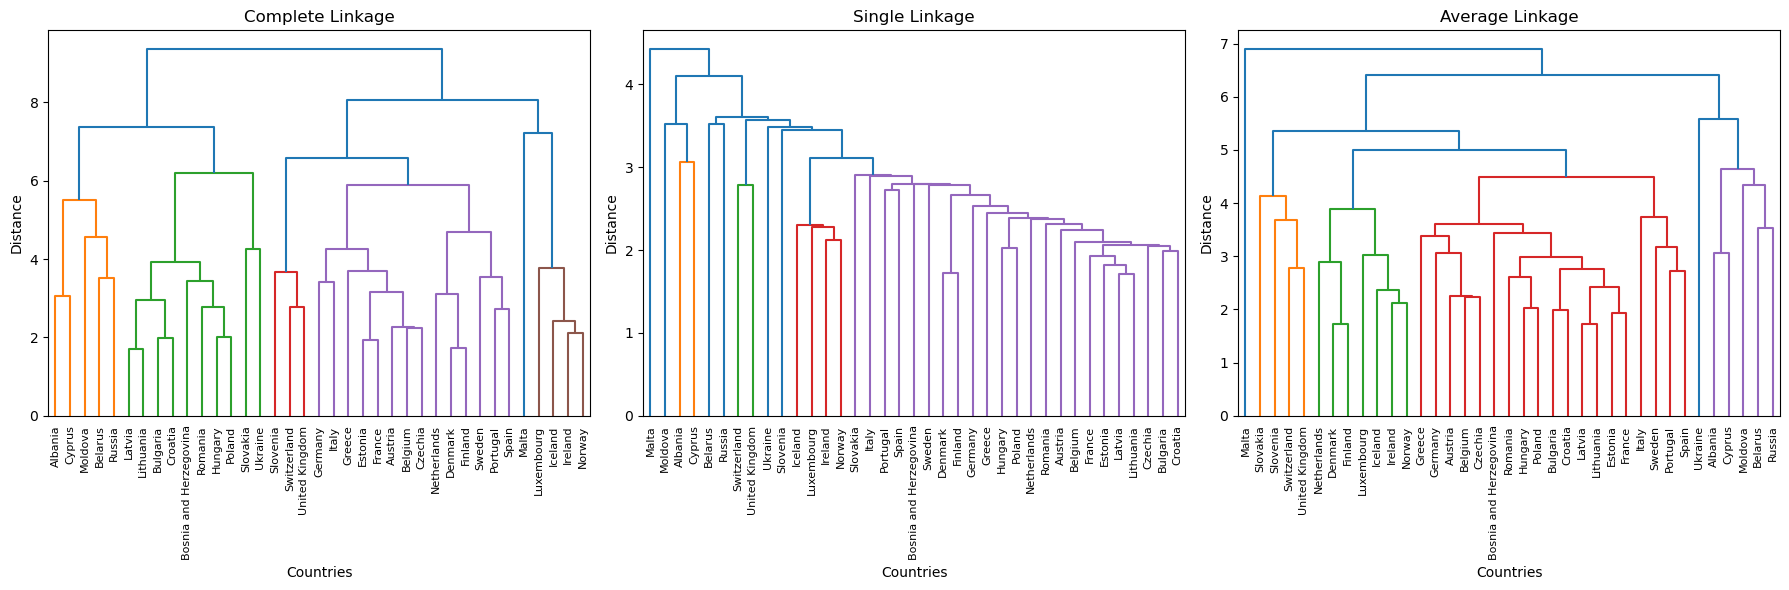

In [53]:
# Hierarchical Clustering

distance_matrix = linkage(data_2021_standardized, method='complete')
distance_matrix_single = linkage(data_2021_standardized, method='single')
distance_matrix_avg = linkage(data_2021_standardized, method='average')

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].set_title('Complete Linkage')
dendrogram(distance_matrix, labels=data_2021_standardized.index, leaf_rotation=90, ax=axs[0])
axs[0].set_xlabel('Countries')
axs[0].set_ylabel('Distance')

axs[1].set_title('Single Linkage')
dendrogram(distance_matrix_single, labels=data_2021_standardized.index, leaf_rotation=90, ax=axs[1])
axs[1].set_xlabel('Countries')
axs[1].set_ylabel('Distance')

axs[2].set_title('Average Linkage')
dendrogram(distance_matrix_avg, labels=data_2021_standardized.index, leaf_rotation=90, ax=axs[2])
axs[2].set_xlabel('Countries')
axs[2].set_ylabel('Distance')

plt.tight_layout()
plt.show()

In [54]:
num_clusters = 4
distance_matrix = linkage(data_2021_standardized, method='complete')
hclust = fcluster(distance_matrix, num_clusters, criterion='maxclust')

data_2021_standardized['hCluster'] = hclust

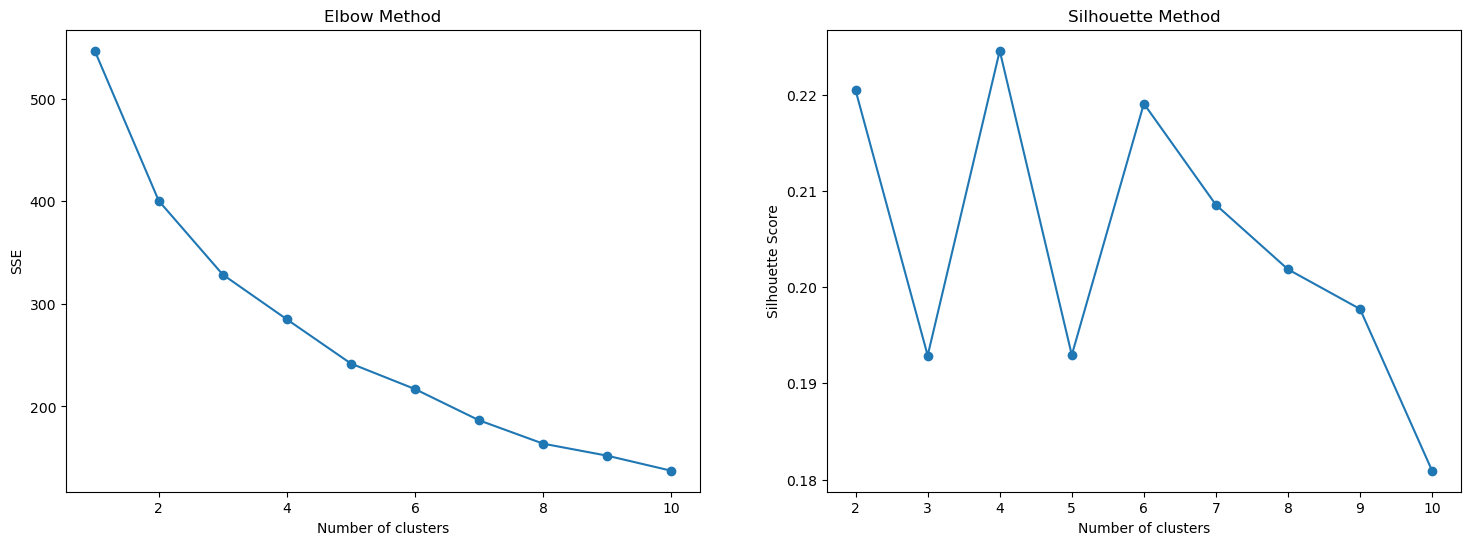

In [55]:
# K-Means

# Elbow Method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=0)
    kmeans.fit(data_2021_standardized)
    sse.append(kmeans.inertia_)

# Silhouette Method
silhouette_scores = []
for k in k_range[1:]:  # silhouette_score not defined for k=1
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=0)
    labels = kmeans.fit_predict(data_2021_standardized)
    silhouette_scores.append(silhouette_score(data_2021_standardized, labels))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

ax1.plot(k_range, sse, marker='o')
ax1.set_title('Elbow Method')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('SSE')

ax2.plot(k_range[1:], silhouette_scores, marker='o')
ax2.set_title('Silhouette Method')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('Silhouette Score')

plt.show()

In [56]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, n_init=20, random_state=0)

kmeans.fit(data_2021_standardized)

kmcluster_labels = kmeans.labels_ + 1
data_2021_standardized['kmCluster'] = kmcluster_labels

In [57]:
hcluster_means = data_2021_standardized.groupby('hCluster').mean()
print("Average values for each variable within hierarchical clusters:")
hcluster_means

Average values for each variable within hierarchical clusters:


total_cases_per_million  total_deaths_per_million  stringency_index  \
hCluster                                                                        
1                       -0.817536                 -0.561662          0.696769   
2                       -0.236502                  0.858461         -0.284617   
3                        0.412953                 -0.004733         -0.002993   
4                       -0.113502                 -1.139167         -0.117358   

          reproduction_rate  population_density  median_age  aged_65_older  \
hCluster                                                                     
1                 -0.035826           -0.306504   -1.433711      -1.685926   
2                 -0.496272           -0.319998    0.266225       0.046339   
3                  0.172507            0.033586    0.572606       0.697911   
4                  0.441844            0.832308   -1.045598      -0.779649   

          aged_70_older  gdp_per_capita  female_smokers  male_smokers  \
hCluster                                                                
1             -1.504972       -0.961199       -1.368065      1.446886   
2             -0.009748       -0.728683        0.425525      0.563132   
3              0.714149        0.252240        0.266775     -0.440733   
4             -0.903637        1.560949       -0.390020     -1.074660   

          hospital_beds_per_thousand  life_expectancy  \
hCluster                                                
1                           0.554134        -1.128393   
2                           0.626982        -0.958918   
3                          -0.331711         0.647450   
4                          -0.680280         0.844900   

          human_development_index  kmCluster  
hCluster                                      
1                       -1.262921   3.000000  
2                       -0.830926   1.900000  
3                        0.598523   1.764706  
4                        0.889794   2.000000

In [58]:
kmcluster_means = data_2021_standardized.groupby('kmCluster').mean()
print("Average values for each variable within k-means clusters:")
kmcluster_means

Average values for each variable within k-means clusters:


total_cases_per_million  total_deaths_per_million  \
kmCluster                                                      
1                        -0.146811                  0.317392   
2                        -0.164340                 -1.033449   
3                        -0.817536                 -0.561662   
4                         1.343753                  1.118948   

           stringency_index  reproduction_rate  population_density  \
kmCluster                                                            
1                  0.338570           0.413082           -0.153860   
2                 -0.113413           0.492475            0.492744   
3                  0.696769          -0.035826           -0.306504   
4                 -1.369802          -1.879257           -0.047759   

           median_age  aged_65_older  aged_70_older  gdp_per_capita  \
kmCluster                                                             
1            0.711870       0.601873       0.663276       -0.257086   
2           -0.568650      -0.112211      -0.339582        1.144334   
3           -1.433711      -1.685926      -1.504972       -0.961199   
4            0.030769      -0.132051      -0.115764       -0.187091   

           female_smokers  male_smokers  hospital_beds_per_thousand  \
kmCluster                                                             
1                0.696479      0.232829                    0.223238   
2               -0.358971     -1.143510                   -0.867052   
3               -1.368065      1.446886                    0.554134   
4               -0.294848     -0.150155                    0.206291   

           life_expectancy  human_development_index  hCluster  
kmCluster                                                      
1                 0.017224                -0.086946  2.588235  
2                 0.776941                 0.949088  3.555556  
3                -1.128393                -1.262921  1.000000  
4                -0.273886                -0.124850  2.500000

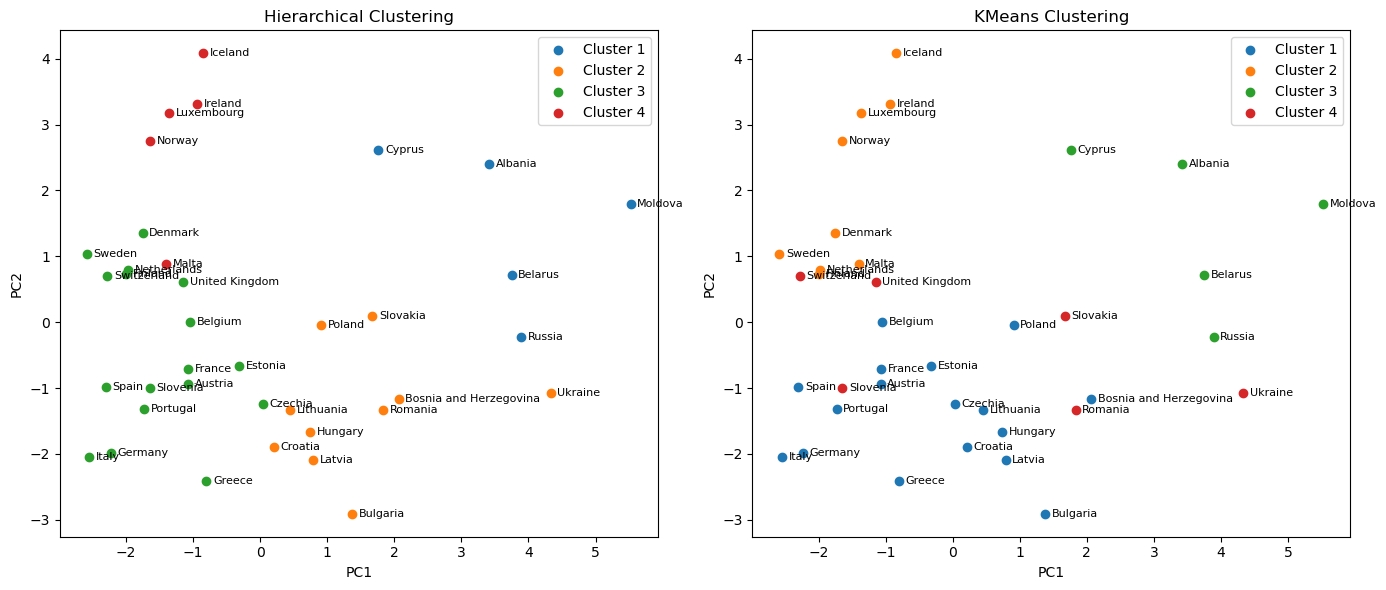

In [59]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for cluster in range(1, num_clusters + 1):
    cluster_data = principal_components[data_2021_standardized['hCluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')
for i, country in enumerate(data_2021_standardized.index):
    plt.text(principal_components[i, 0] + 0.1, principal_components[i, 1], country, 
             color='black', fontsize=8, ha='left', va='center')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Hierarchical Clustering')
plt.legend()

plt.subplot(1, 2, 2)
for cluster in range(1, num_clusters + 1):
    cluster_data = principal_components[data_2021_standardized['kmCluster'] == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')
for i, country in enumerate(data_2021_standardized.index):
    plt.text(principal_components[i, 0] + 0.1, principal_components[i, 1], country, 
             color='black', fontsize=8, ha='left', va='center')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clustering')
plt.legend()

plt.tight_layout()
plt.show()

In [60]:
ari = adjusted_rand_score(data_2021_standardized['hCluster'], data_2021_standardized['kmCluster'])
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.2762193744149262


## Conclusions

To sum up, in this project the complicated landscape of the COVID-19 pandemic characterizing the European continent was explored, employing a wide array of data exploration, cleaning, preprocessing, visualization, and modeling techniques. Data exploration and visualization yielded valuable insights into the dynamics of the pandemic across Europe, analyzing metrics such as total cases, deaths, and stringency index to identify temporal trends and geographical variations. Notably, the analysis highlighted the significant impact of containment measures and lockdowns on COVID-19 transmission, showing a clear inverse relationship between the stringency index and the number of total cases. Additionally, by combining social, economic, and public health data, the study revealed how the pandemic affects various aspects of society, highlighting the importance of considering broader societal issues when creating effective response plans. While initial linear regression offered preliminary insights into the connection between containment policies and infections, the modest explanatory capacity indicated the necessity for more sophisticated modeling techniques. Following the experimentation with polynomial regression, the relevance of each feature was examined, and more complex models such as ridge, lasso, and random forest regression were built. Moreover, leveraging principal component analysis (PCA) and clustering methods provided deeper insights into the intricate factors driving variations in COVID-19 dynamics across European nations, revealing some patterns in country categorization. Ultimately, the project underscored the indispensable role of data-driven approaches in informing evidence-based strategies to mitigate the pandemic's societal impact, emphasizing the crucial reliance on empirical evidence in navigating such complex scenarios.